# I. Problem Definition
## ---------------------------------------------------------------------------

This case requires to develop a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.
The source for the dataset is https://www.kaggle.com/datasets/arjunbhasin2013/ccdata/data

Following is the Data Dictionary for Credit Card dataset :-

* CUST_ID : Identification of Credit Card holder (Categorical)
* BALANCE : Balance amount left in their account to make purchases (
* BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* PURCHASES : Amount of purchases made from account
* ONEOFF_PURCHASES : Maximum purchase amount done in one-go
* INSTALLMENTS_PURCHASES : Amount of purchase done in installment
* CASH_ADVANCE : Cash in advance given by the user
* PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
* CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
* PURCHASES_TRX : Numbe of purchase transactions made
* CREDIT_LIMIT : Limit of Credit Card for user
* PAYMENTS : Amount of Payment done by user
* MINIMUM_PAYMENTS : Minimum amount of payments made by user
* PRCFULLPAYMENT : Percent of full payment paid by user
* TENURE : Tenure of credit card service for user

# II. Data Exploration and Preprocessing
##-----------------------------------------------------------------------------

In [44]:
import pandas as pd
%run library/descriptivestatistics.ipynb

In [45]:
#Load dataset and basic info
data= pd.read_csv('CCGENERAL.csv')
df=pd.DataFrame(data)
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [46]:
df.drop('CUST_ID', axis=1, inplace = True)

##OVERVIEW OF THE DATASET

In [47]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [4]:
#DUPLICATE DATA
df.duplicated ().sum ()

0

In [4]:
missing_data(df).style.highlight_max(color = 'green', axis = 0)


,name of column,types,unique_data,missing value,missing percentage
0,BALANCE,float64,8871,0,0.000000
1,BALANCE_FREQUENCY,float64,43,0,0.000000
2,PURCHASES,float64,6203,0,0.000000
3,ONEOFF_PURCHASES,float64,4014,0,0.000000
4,INSTALLMENTS_PURCHASES,float64,4452,0,0.000000
5,CASH_ADVANCE,float64,4323,0,0.000000
6,PURCHASES_FREQUENCY,float64,47,0,0.000000
7,ONEOFF_PURCHASES_FREQUENCY,float64,47,0,0.000000
8,PURCHASES_INSTALLMENTS_FREQUENCY,float64,47,0,0.000000
9,CASH_ADVANCE_FREQUENCY,float64,54,0,0.000000


In [8]:
analyze_dataset_numerical(df).style.highlight_max(color = 'green', axis = 0)

,column,n,min,max,mean,std,median,q1,q3,iqr,skewness,kurtosis,lower_fence,upper_fence,n_outliers
0,BALANCE,8950,0.000000,19043.138560,1564.474828,2081.531879,873.385231,128.281915,2054.140036,1925.858120,2.392985,7.669794,-2760.505265,4942.927215,695
1,BALANCE_FREQUENCY,8950,0.000000,1.000000,0.877271,0.236904,1.000000,0.888889,1.000000,0.111111,-2.022926,3.089972,0.722223,1.166666,1493
2,PURCHASES,8950,0.000000,49039.570000,1003.204834,2136.634782,361.280000,39.635000,1110.130000,1070.495000,8.142904,111.325882,-1566.107500,2715.872500,808
3,ONEOFF_PURCHASES,8950,0.000000,40761.250000,592.437371,1659.887917,38.000000,0.000000,577.405000,577.405000,10.043399,164.095191,-866.107500,1443.512500,1013
4,INSTALLMENTS_PURCHASES,8950,0.000000,22500.000000,411.067645,904.338115,89.000000,0.000000,468.637500,468.637500,7.297897,96.520563,-702.956250,1171.593750,867
5,CASH_ADVANCE,8950,0.000000,47137.211760,978.871112,2097.163877,0.000000,0.000000,1113.821139,1113.821139,5.165743,52.869216,-1670.731709,2784.552848,1030
6,PURCHASES_FREQUENCY,8950,0.000000,1.000000,0.490351,0.401371,0.500000,0.083333,0.916667,0.833334,0.060154,-1.638386,-1.166668,2.166668,0
7,ONEOFF_PURCHASES_FREQUENCY,8950,0.000000,1.000000,0.202458,0.298336,0.083333,0.000000,0.300000,0.300000,1.535355,1.160526,-0.450000,0.750000,782
8,PURCHASES_INSTALLMENTS_FREQUENCY,8950,0.000000,1.000000,0.364437,0.397448,0.166667,0.000000,0.750000,0.750000,0.509116,-1.398521,-1.125000,1.875000,0
9,CASH_ADVANCE_FREQUENCY,8950,0.000000,1.500000,0.135144,0.200121,0.000000,0.000000,0.222222,0.222222,1.828380,3.332201,-0.333333,0.555555,525


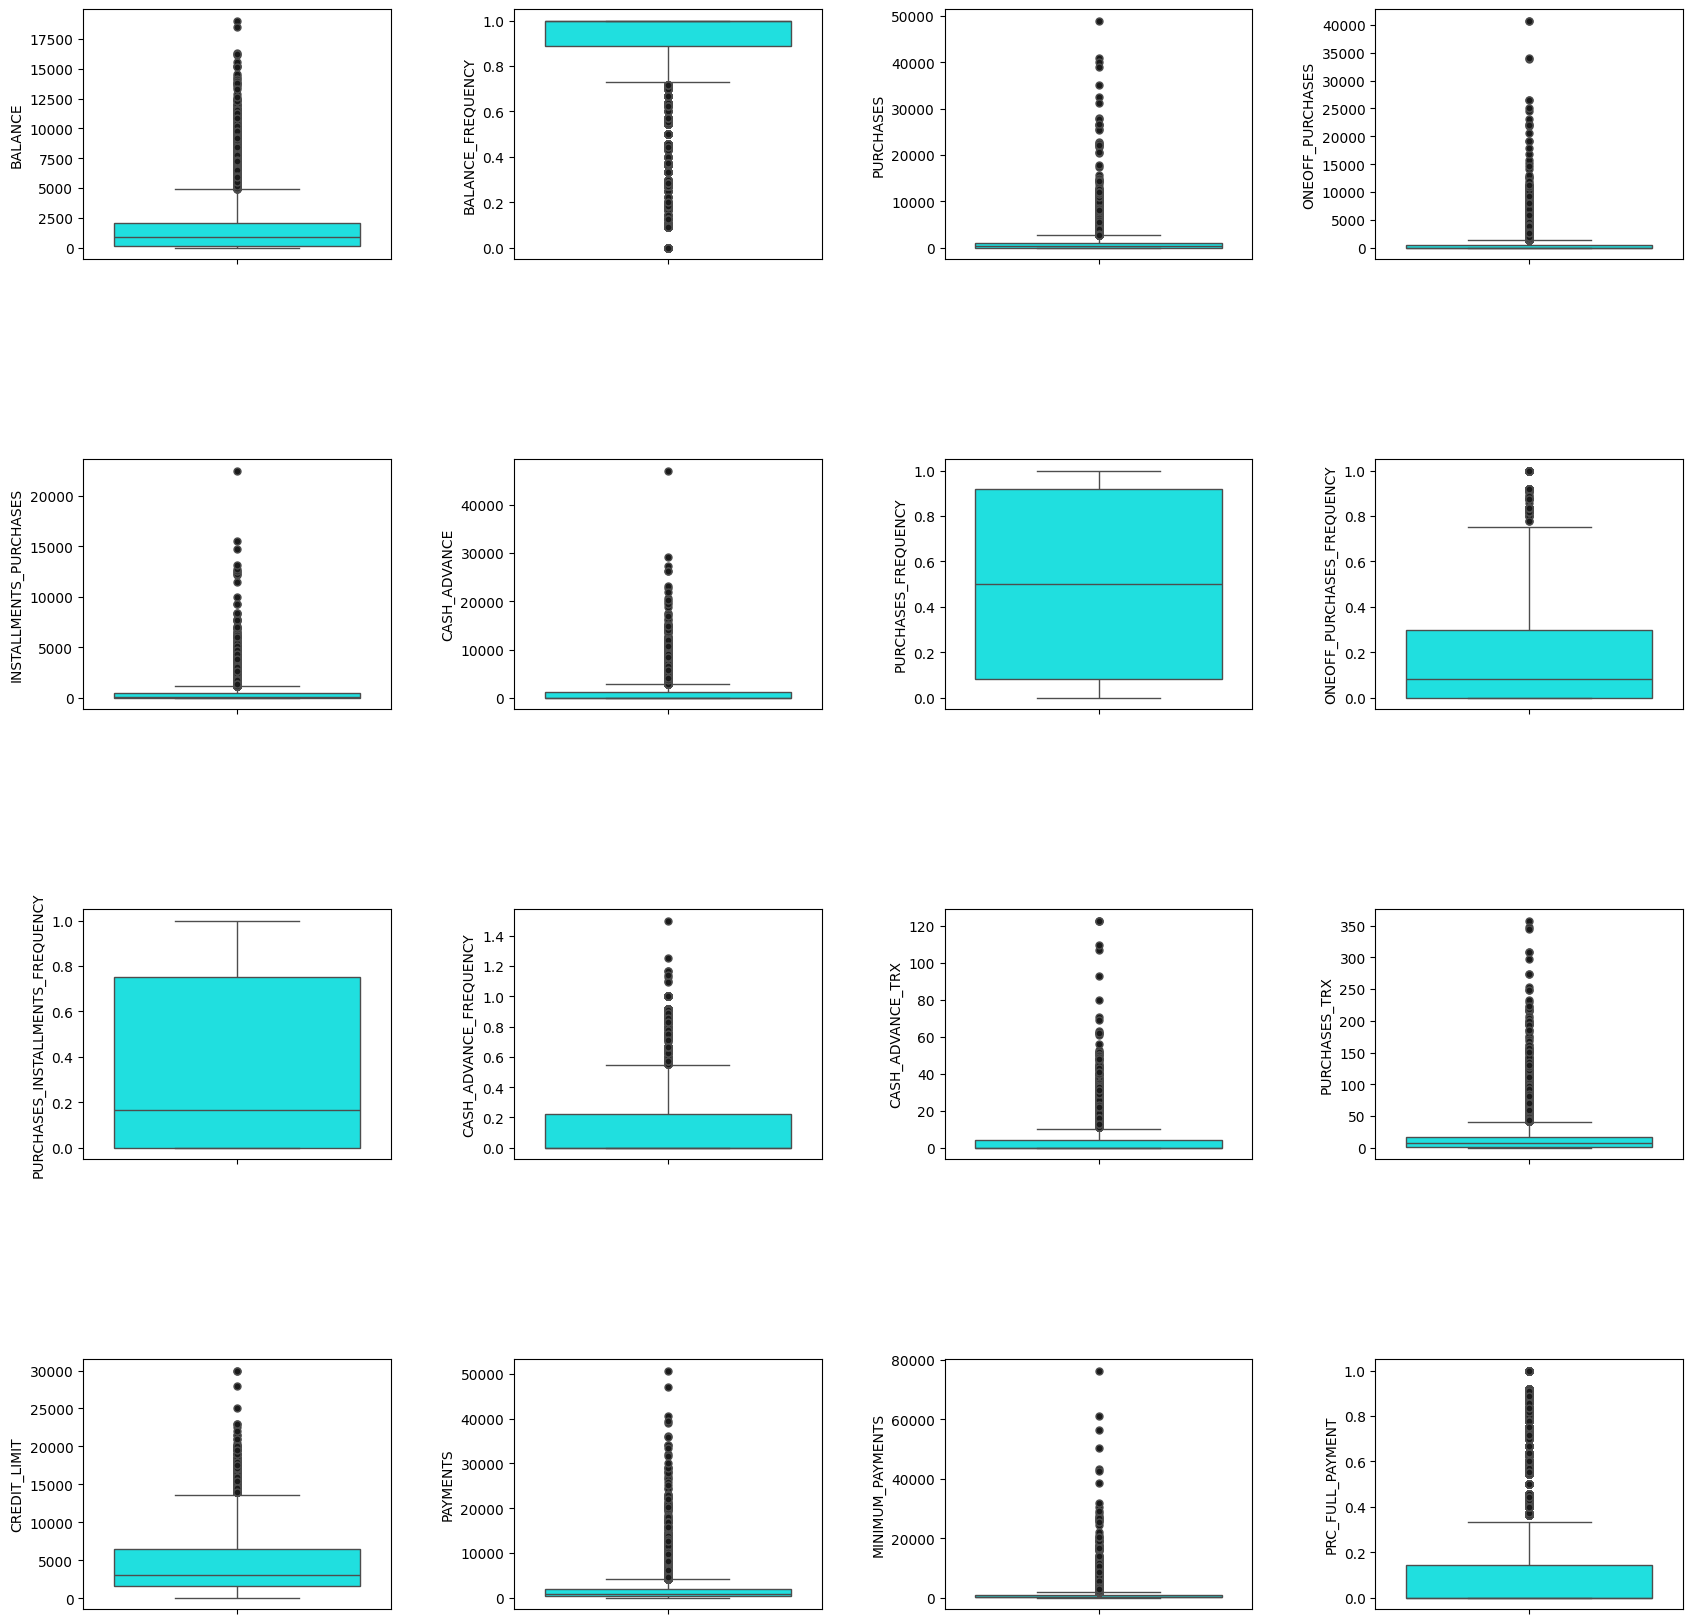

In [9]:
boxplot_df(df)

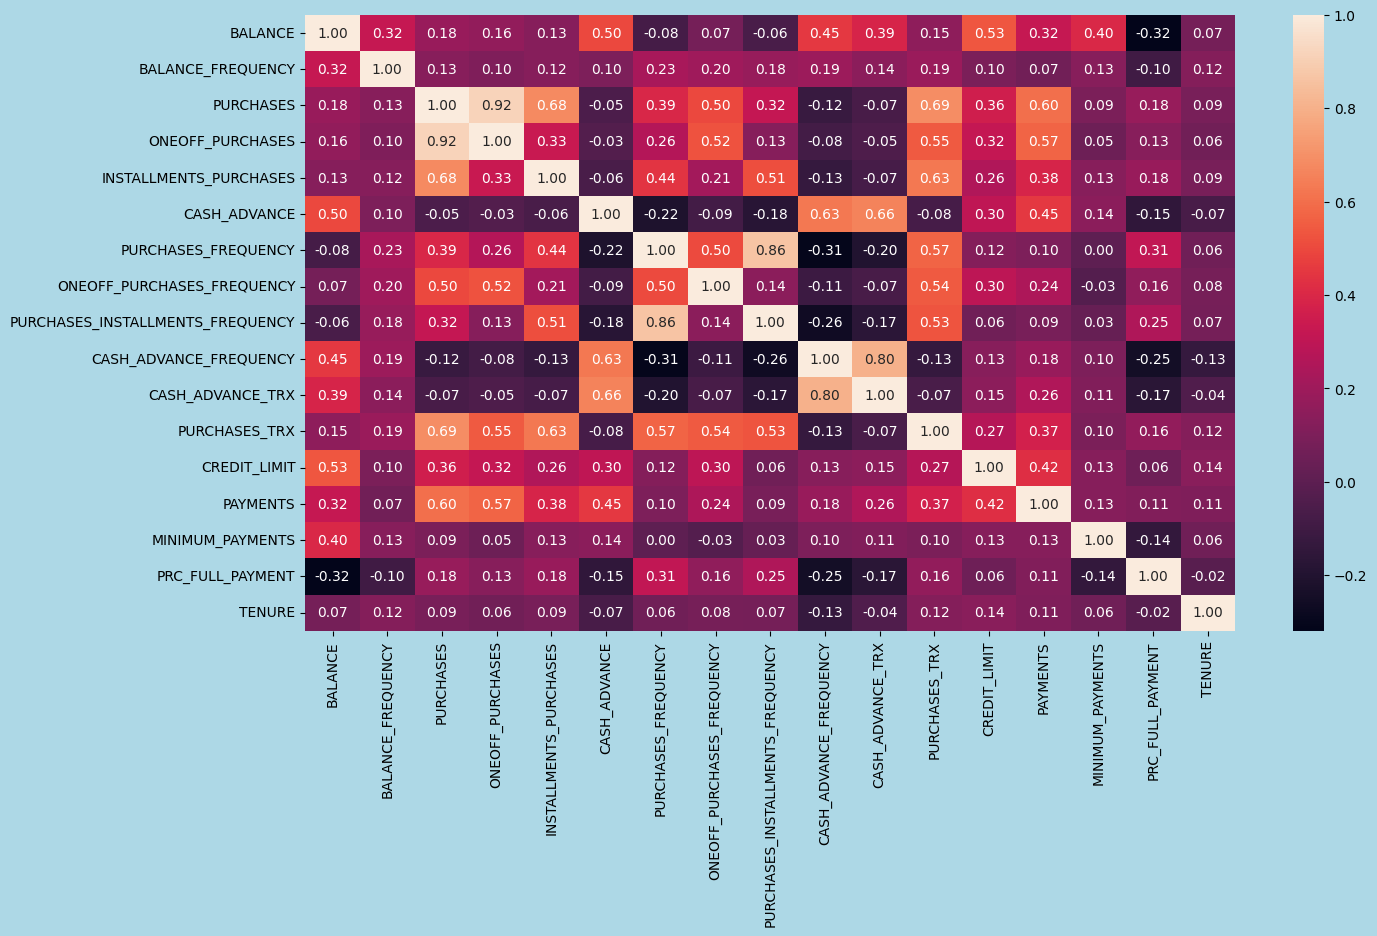

In [ ]:
plot_correlation_matrix(df)
#fig = plt.figure(figsize = (15, 8), facecolor='lightblue')
#sns.heatmap(df.corr() , annot=True , fmt=".2f")

In [ ]:
df.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531283,0.322802,0.398684,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095843,0.065008,0.132569,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356963,0.603264,0.093860,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319724,0.567292,0.048755,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256499,0.384084,0.132172,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303985,0.453238,0.140107,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119788,0.103464,0.003030,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295038,0.243537,-0.030327,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060755,0.085551,0.030073,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.098838,-0.249773,-0.133372


###Interpretation of Results

#### MISSING DATA

**Overall Missing Data:**

Most columns in the dataset have no missing values at all, which is a good sign.

**Columns with Missing Data:**

CREDIT_LIMIT: This column has 1 missing value, which accounts for 0.01% of the data. This is a very small proportion and might not have a significant impact in the analysis.
MINIMUM_PAYMENTS: This column has 313 missing values, which corresponds to 3.5% of the data. While this is still a relatively low percentage, it’s more substantial than the missing data in the CREDIT_LIMIT column.
We will analyze in deep the variable first and the relation with other variable to impute or drop it.

**Actions:**

For CREDIT_LIMIT, since only one value is missing, we will drop the row.
For MINIMUM_PAYMENTS:
Analysis: We will analyze the relation of these variable with others as PAYMENT, to fill the missing values. After these we will analyze and use a method to impute the data (methods like replace the value with statistic as mean, median, or k-nearest neighbors imputation).

#### OUTLIERS
**High Skewness and Kurtosis**:

- PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PAYMENTS, MINIMUM_PAYMENTS:

  These columns show high positive skewness and kurtosis, indicating that most users have low values in these categories, but there are a few who have very high values. This results in many extreme outliers.

  The large number of outliers (e.g., 808 in PURCHASES, 1030 in CASH_ADVANCE) suggests that the distributions are heavily tailed.

**Columns with No Outliers (or Zero)**:

- PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, TENURE:

  These variables show either no outliers or a very specific distribution (e.g., TENURE is very tightly clustered around 12 with many data points, hence a large number of outliers based on the IQR method).

  The fact that these variables have zero or few outliers suggests a more uniform distribution within the boundaries set by IQR.

**Columns with a Large Number of Outliers**:

- BALANCE, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE:

  The large number of outliers in these columns could be due to a few users having significantly higher balances, purchases, or cash advances.
  These outliers might represent important segments (e.g., high-value customers) that should be considered separately in the analysis.

**Next Steps and Recommendations**:

**Handling Outliers**:

- Transformation Techniques:

  Apply transformations (e.g., log transformation) to normalize the data and reduce skewness. This can make the data more suitable for analysis, particularly for models that assume normality.
  For example, applying a log transformation to PURCHASES or CASH_ADVANCE can reduce their skewness.

- Handling Missing Data in Outlier Columns:

  If columns like MINIMUM_PAYMENTS have both missing values and a high number of outliers, consider imputation methods that account for outliers, such as using median rather than mean, or more advanced techniques like multiple imputation.

#### CORRELATION
The correlation matrix provides insights into the relationships between the different variables in the dataset. Here are the key takeaways and possible actions:

**Strong Correlations:**

- PURCHASES and ONEOFF_PURCHASES (0.92):

  A very high positive correlation suggests that customers who make a lot of purchases tend to make a lot of one-off purchases. This could indicate that a single factor is driving both behaviors, or that these two features might be capturing the same information. We will consider combining these features or using dimensionality reduction techniques like PCA to address potential multicollinearity.

- CASH_ADVANCE and CASH_ADVANCE_FREQUENCY (0.63) & CASH_ADVANCE_TRX (0.66):

  These strong correlations indicate that as the amount of cash advances increases, so do the frequency and number of transactions. This makes sense logically, but it also means these variables are not entirely independent of each other.

- PURCHASES and PURCHASES_FREQUENCY (0.39):

  Moderate positive correlation suggests that higher purchases are associated with higher purchase frequency. This relationship makes sense and can be a useful feature for clustering customer behavior.

**Negative Correlations:**
- PRC_FULL_PAYMENT and BALANCE (-0.32):

  This negative correlation suggests that customers who frequently pay their balance in full tend to have lower balances, which is logical. This feature can be significant when identifying customer segments based on payment behavior.

- PRC_FULL_PAYMENT and CASH_ADVANCE_FREQUENCY (-0.25):

  Negative correlation implies that customers who frequently pay their full balance are less likely to rely on cash advances. This could indicate different financial behavior or stability between customer groups.

**Weak or No Correlations:**
- TENURE with Most Variables:
  The TENURE column has weak correlations with most other features, indicating that the length of time a customer has had the account doesn't strongly influence their spending or payment behavior. However, tenure might still be a useful segmentation variable depending on the business context.

**Potential Multicollinearity:**

**High Correlation Groups:**

- PURCHASES, ONEOFF_PURCHASES, and PURCHASES_TRX: These features are moderately to highly correlated. Multicollinearity could be an issue, which can distort the results of clustering algorithms. Consider dimension reduction methods or combining similar features to reduce redundancy.
- CASH_ADVANCE, CASH_ADVANCE_FREQUENCY, and CASH_ADVANCE_TRX: These are also highly correlated. Again, it is good to consider reducing the number of related features or using techniques to reduce dimensionality.

**Actions:*
- Dimensionality Reduction: Given the presence of correlated variables, we might consider techniques like PCA (Principal Component Analysis) to reduce the dimensionality of the dataset. This will help in simplifying the dataset while retaining as much variance as possible.
- Transformation: Apply logarithmic transformations to variables with high skewness to reduce the impact of extreme values on clustering.

- Clustering Preparation:

  - Normalization/Standardization: Standardize or normalize the data before applying clustering techniques. This will ensure that variables with larger ranges do not dominate the clustering process.
  - Select Features for Clustering: Based on the correlation analysis, we will select the most relevant and independent features for clustering. But first we will apply PCA to reduce highly correlated variables.

##DATA CLEANING

**MISSING DATA**

In [48]:
# missing values in 'CREDIT_LIMIT' column(this column has one missing value)
nulls_value = pd.isnull(df["CREDIT_LIMIT"])
df[nulls_value]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [49]:
df.drop([5203], axis=0, inplace=True)
df.reset_index( inplace = True)
df.drop('index',axis=1,inplace = True)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8945,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8946,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8947,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [50]:
# MINIMUM_PAYMENTS has so much missing value so it is reasonable to find a solution for fill them
df[['PAYMENTS', 'MINIMUM_PAYMENTS']][df['MINIMUM_PAYMENTS'].isna()]

,PAYMENTS,MINIMUM_PAYMENTS
3,0.000000,NaN
45,0.000000,NaN
47,0.000000,NaN
54,417.016763,NaN
55,0.000000,NaN
...,...,...
8918,0.000000,NaN
8928,0.000000,NaN
8934,0.000000,NaN
8943,0.000000,NaN


In [51]:
#The value of zero should be used for MINIMUM_PAYMENTS's cells Who they haven't done any payments so if PAYMENTS = 0 then MINIMUM_PAYMENTS = 0

# Step 1: Identify rows with NaN in 'MINIMUM_PAYMENTS'
nan_min_payments = df['MINIMUM_PAYMENTS'].isna()

# Step 2: Check where 'PAYMENTS' is 0 and 'MINIMUM_PAYMENTS' is NaN
condition = (df['PAYMENTS'] == 0) & nan_min_payments

# Step 3: Replace NaN in 'MINIMUM_PAYMENTS' with 0 where 'PAYMENTS' is 0
df.loc[condition, 'MINIMUM_PAYMENTS'] = 0

In [9]:
missing_data(df).style.highlight_max(color = 'green', axis = 0)

,name of column,types,unique_data,missing value,missing percentage
0,BALANCE,float64,8870,0,0.000000
1,BALANCE_FREQUENCY,float64,43,0,0.000000
2,PURCHASES,float64,6203,0,0.000000
3,ONEOFF_PURCHASES,float64,4014,0,0.000000
4,INSTALLMENTS_PURCHASES,float64,4452,0,0.000000
5,CASH_ADVANCE,float64,4322,0,0.000000
6,PURCHASES_FREQUENCY,float64,47,0,0.000000
7,ONEOFF_PURCHASES_FREQUENCY,float64,47,0,0.000000
8,PURCHASES_INSTALLMENTS_FREQUENCY,float64,47,0,0.000000
9,CASH_ADVANCE_FREQUENCY,float64,54,0,0.000000


<Axes: xlabel='MINIMUM_PAYMENTS', ylabel='Count'>

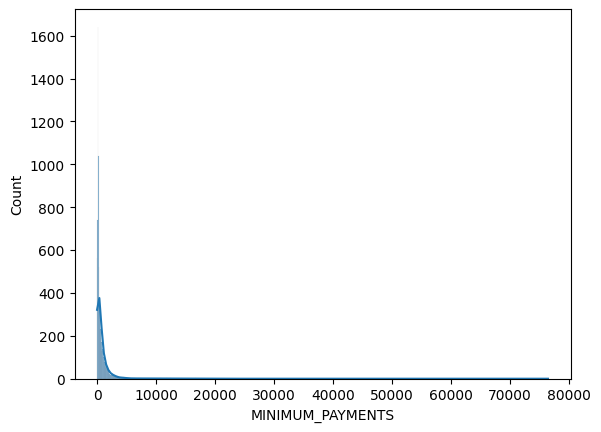

In [10]:
import seaborn as sns
sns.histplot(df['MINIMUM_PAYMENTS'], kde=True)

The distribution is skewed, so median imputation is preferred as the median is less sensitive to outliers than the mean.

In [52]:
df.fillna(df.median() , inplace = True)

In [53]:
missing_data(df).style.highlight_max(color = 'green', axis = 0)

,name of column,types,unique_data,missing value,missing percentage
0,BALANCE,float64,8870,0,0.000000
1,BALANCE_FREQUENCY,float64,43,0,0.000000
2,PURCHASES,float64,6203,0,0.000000
3,ONEOFF_PURCHASES,float64,4014,0,0.000000
4,INSTALLMENTS_PURCHASES,float64,4452,0,0.000000
5,CASH_ADVANCE,float64,4322,0,0.000000
6,PURCHASES_FREQUENCY,float64,47,0,0.000000
7,ONEOFF_PURCHASES_FREQUENCY,float64,47,0,0.000000
8,PURCHASES_INSTALLMENTS_FREQUENCY,float64,47,0,0.000000
9,CASH_ADVANCE_FREQUENCY,float64,54,0,0.000000


Data

In [13]:
analyze_dataset_numerical(df).style.highlight_max(color = 'green', axis = 0)

,column,n,min,max,mean,std,median,q1,q3,iqr,skewness,kurtosis,lower_fence,upper_fence,n_outliers
0,BALANCE,8949,0.000000,19043.138560,1564.647593,2081.584016,873.680279,128.365782,2054.372848,1926.007066,2.392869,7.669089,-2760.644817,4943.383447,695
1,BALANCE_FREQUENCY,8949,0.000000,1.000000,0.877350,0.236798,1.000000,0.888889,1.000000,0.111111,-2.023854,3.095206,0.722223,1.166666,1492
2,PURCHASES,8949,0.000000,49039.570000,1003.316936,2136.727848,361.490000,39.800000,1110.170000,1070.370000,8.142604,111.317027,-1565.755000,2715.725000,808
3,ONEOFF_PURCHASES,8949,0.000000,40761.250000,592.503572,1659.968851,38.000000,0.000000,577.830000,577.830000,10.042938,164.079674,-866.745000,1444.575000,1013
4,INSTALLMENTS_PURCHASES,8949,0.000000,22500.000000,411.113579,904.378205,89.000000,0.000000,468.650000,468.650000,7.297600,96.512552,-702.975000,1171.625000,867
5,CASH_ADVANCE,8949,0.000000,47137.211760,978.959616,2097.264344,0.000000,0.000000,1113.868654,1113.868654,5.165457,52.863880,-1670.802981,2784.671635,1030
6,PURCHASES_FREQUENCY,8949,0.000000,1.000000,0.490405,0.401360,0.500000,0.083333,0.916667,0.833334,0.059960,-1.638366,-1.166668,2.166668,0
7,ONEOFF_PURCHASES_FREQUENCY,8949,0.000000,1.000000,0.202480,0.298345,0.083333,0.000000,0.300000,0.300000,1.535196,1.160000,-0.450000,0.750000,782
8,PURCHASES_INSTALLMENTS_FREQUENCY,8949,0.000000,1.000000,0.364478,0.397451,0.166667,0.000000,0.750000,0.750000,0.508938,-1.398687,-1.125000,1.875000,0
9,CASH_ADVANCE_FREQUENCY,8949,0.000000,1.500000,0.135141,0.200132,0.000000,0.000000,0.222222,0.222222,1.828338,3.331658,-0.333333,0.555555,525


##DATA PREPARATION

**Standardization**

In [54]:
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your pandas DataFrame with all numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

**PCA**

In [55]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=0.95)  # This keeps enough components to explain 95% of the variance
principal_components = pca.fit_transform(scaled_data)

# To see the amount of variance each component explains
explained_variance = pca.explained_variance_ratio_

# to see the cumulative variance explained
cumulative_variance = explained_variance.cumsum()

# Transform the scaled data into principal components
principal_df = pd.DataFrame(data=principal_components)

# Assign Proper Names to the Principal Components
# Assuming you have 'n' principal components
num_components = principal_df.shape[1]
principal_df.columns = [f'PC{i+1}' for i in range(num_components)]

In [56]:
print(explained_variance)


[0.27298502 0.20317663 0.08821402 0.07478978 0.06213303 0.05733518
 0.04881999 0.04315878 0.03787951 0.03080103 0.02372483 0.01773507]


In [57]:
print(cumulative_variance)

[0.27298502 0.47616165 0.56437567 0.63916545 0.70129848 0.75863366
 0.80745366 0.85061243 0.88849194 0.91929297 0.9430178  0.96075287]


**Visualizing Explained Variance**

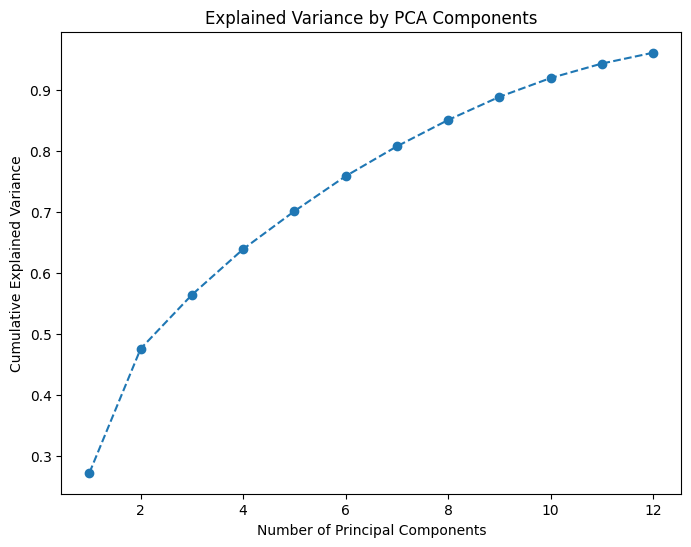

In [58]:
import matplotlib.pyplot as plt

# Plotting the explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.show()

In [59]:
principal_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-1.684314,-1.070768,0.471984,0.684865,0.052306,0.078428,0.818269,-0.011086,0.119339,-0.078727,-0.236206,-0.051912
1,-1.133114,2.509979,0.603254,-0.104770,0.691854,-1.081089,-0.389011,0.189675,0.670419,-0.778600,-0.870321,-0.609628
2,0.968927,-0.383530,0.088842,1.246863,-2.162193,-0.376489,-1.528326,-0.245154,-0.864233,-0.001260,-0.762383,0.683952
3,-0.897179,-0.017775,1.528595,1.028845,0.183848,-0.200462,-0.211113,-0.762676,-0.018590,0.393368,0.749350,0.100636
4,-1.600472,-0.682058,0.342960,1.021378,-0.442195,0.079080,0.693015,0.257740,0.576341,-0.122857,-0.455099,-0.109460


**PCA LOADING**

In [60]:
# Get the principal components and create a DataFrame:
original_feature_names = df.columns.tolist()
pca_components = pd.DataFrame(pca.components_, columns=original_feature_names)
# Display the PCA components with the original feature names
print(pca_components)

     BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0   0.101916           0.120518   0.411556          0.346324   
1   0.403766           0.131671   0.039702          0.061614   
2  -0.161962          -0.423569   0.257197          0.390394   
3   0.277990           0.157764   0.042174          0.086918   
4   0.051138          -0.474342   0.025307         -0.163664   
5   0.044140           0.014744   0.182782          0.177777   
6  -0.255128           0.098873   0.198692          0.119968   
7  -0.171453           0.290274   0.027746          0.127582   
8   0.126692           0.615232   0.104666          0.012577   
9   0.031509          -0.082246   0.051093         -0.175279   
10  0.149104          -0.118777   0.200787          0.448286   
11 -0.480823           0.089613   0.074500         -0.052536   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                 0.336761     -0.022675             0.321138   
1                -0.019380      0.438

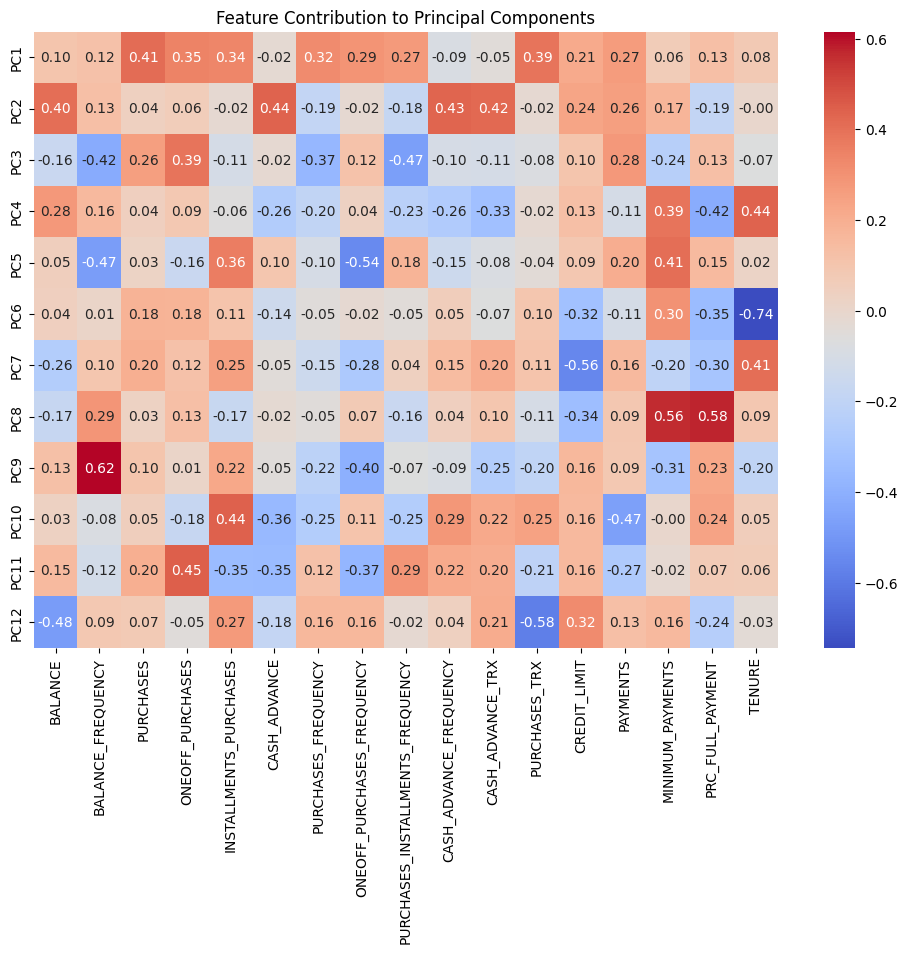

In [61]:
#PCA Loadings
import seaborn as sns
import matplotlib.pyplot as plt

def plot_pca_heatmap(pca_components):
    plt.figure(figsize=(12, 8))
    sns.heatmap(pca_components, cmap='coolwarm', annot=True, fmt=".2f",
                yticklabels=[f'PC{i+1}' for i in range(pca_components.shape[0])],
                xticklabels=original_feature_names)
    plt.title("Feature Contribution to Principal Components")
    plt.show()

# Example usage:
plot_pca_heatmap(pca_components)

**Insights from PCA Loadings**

Principal Component 1 (PC1):

- High Positive Loadings: PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, PURCHASES_FREQUENCY, PURCHASES_TRX

  Insight: PC1 seems to capture overall purchasing behavior, especially related to one-off purchases, installment purchases, and transaction frequency. Customers with high values in PC1 are likely to have high spending and frequent purchasing activity.

Principal Component 2 (PC2):
- High Positive Loadings: BALANCE, CASH_ADVANCE, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX

  Insight: PC2 is associated with cash advance behavior. Customers with high values in PC2 tend to rely more on cash advances, both in terms of frequency and amount.

Principal Component 3 (PC3):
- High Positive Loadings: BALANCE_FREQUENCY, CREDIT_LIMIT, PAYMENTS
- High Negative Loadings: MINIMUM_PAYMENTS
  
  Insight: PC3 might be capturing credit management behavior. High values in PC3 suggest customers with higher balances, credit limits, and payments, but lower minimum payments, possibly indicating good credit management.

Principal Component 4 (PC4):
- High Positive Loadings: TENURE, PAYMENTS
- High Negative Loadings: BALANCE_FREQUENCY, CREDIT_LIMIT

  Insight: PC4 might be capturing long-term customer behavior and payment consistency. High values in PC4 suggest longer tenure and consistent payments, with a focus on maintaining credit balance over time.


**Interpreting Principal Components**

Given these interpretations, we can infer that:

- PC1 is a strong indicator of overall spending and purchasing habits.
- PC2 is tied to reliance on cash advances, which might indicate financial stress or a specific need for liquidity.
- PC3 and PC4 are more related to credit management and customer tenure.

# III. CLUSTERING

**Functions to plot results**

In [87]:
def plot_cluster_distribution(data, cluster_column='Cluster', figsize=(14, 6)):
    """
    Plot the cluster distribution as both a bar plot and a pie chart using elegant pastel colors.

    Parameters:
    - data: pandas DataFrame containing the dataset
    - cluster_column: name of the column containing cluster labels (default: 'Cluster')
    - figsize: tuple specifying the figure size (default: (14, 6))
    """
    # Count the occurrences of each cluster
    cluster_counts = data[cluster_column].value_counts().sort_index()

    # Create a custom pastel color palette
    pastel_colors = sns.color_palette("pastel")

    # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)

    # Bar plot
    cluster_counts.plot(kind='bar', ax=ax1, color=pastel_colors)
    ax1.set_title('Cluster Distribution', fontsize=16)
    ax1.set_xlabel('Cluster', fontsize=12)
    ax1.set_ylabel('Count', fontsize=12)
    ax1.tick_params(axis='x', rotation=0)

    # Add value labels on top of each bar
    for i, v in enumerate(cluster_counts):
        ax1.text(i, v, str(v), ha='center', va='bottom', fontsize=10)

    # Pie chart
    wedges, texts, autotexts = ax2.pie(cluster_counts,
                                       labels=cluster_counts.index,
                                       autopct='%1.1f%%',
                                       startangle=90,
                                       colors=pastel_colors)
    ax2.set_title('Cluster Distribution (%)', fontsize=16)

    # Enhance the appearance of the pie chart text
    plt.setp(autotexts, size=10, weight="bold")
    plt.setp(texts, size=12)

    # Add a legend to the pie chart
    ax2.legend(wedges, cluster_counts.index,
               title="Clusters",
               loc="center left",
               bbox_to_anchor=(1, 0, 0.5, 1))

    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming you have a pandas DataFrame named 'df' with a 'Cluster' column
# plot_cluster_distribution(df)


def plot_cluster_pairplot(data, features, cluster_col='Cluster'):
    plt.style.use("bmh")
    plt.rcParams['figure.facecolor'] = 'lightgrey'

    # Ensure the cluster column is included in the features list
    if cluster_col not in features:
        features.append(cluster_col)

    sns.pairplot(data[features], hue=cluster_col, corner=True, palette="bright")
    plt.suptitle("Pairplot of Clusters Across Selected Features", y=1.02)
    plt.show()


def plot_metrics_comparison(metrics_df):
    # Use the 'grayscale' style for the plot
    plt.style.use('grayscale')
    fig, axs = plt.subplots(2, 2, figsize=(12, 7))

    # List of metrics to plot
    metrics = ['Inertia', 'Silhouette_Score', 'Davies_Bouldin_Score', 'Calinski_Harabasz_Score']

    # Iterate over subplots and plot each metric from the DataFrame
    for i in range(2):
        for j in range(2):
            index = i * 2 + j
            if index < len(metrics):
                metric_name = metrics[index]
                axs[i, j].plot(metrics_df['Num_Clusters'], metrics_df[metric_name], marker='o')
                axs[i, j].set_xticks(metrics_df['Num_Clusters'])
                axs[i, j].set_xlabel('Number of Clusters')
                axs[i, j].set_ylabel(metric_name)
                axs[i, j].set_title(metric_name)
                axs[i, j].grid(True)

    # Adjust the layout to prevent overlap
    plt.tight_layout()
    plt.show()

# Example usage:
# plot_metrics_comparison(metrics_df)

def plot_metrics_comparison2(metrics_df):
    # Use the 'grayscale' style for the plot
    plt.style.use('grayscale')
    fig, axs = plt.subplots(2, 2, figsize=(12, 7))

    # List of metrics to plot
    metrics = ['Silhouette_Score', 'Davies_Bouldin_Score', 'Calinski_Harabasz_Score']

    # Iterate over subplots and plot each metric from the DataFrame
    for i in range(2):
        for j in range(2):
            index = i * 2 + j
            if index < len(metrics):
                metric_name = metrics[index]
                axs[i, j].plot(metrics_df['Num_Clusters'], metrics_df[metric_name], marker='o')
                axs[i, j].set_xticks(metrics_df['Num_Clusters'])
                axs[i, j].set_xlabel('Number of Clusters')
                axs[i, j].set_ylabel(metric_name)
                axs[i, j].set_title(metric_name)
                axs[i, j].grid(True)

    # Adjust the layout to prevent overlap
    plt.tight_layout()
    plt.show()

# Example usage:
# plot_metrics_comparison(metrics_df)

## KMEANS

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA

# Assuming `principal_df` is the PCA-transformed DataFrame
data = principal_df.values

# Function to evaluate the optimal number of clusters
def evaluate_clusters(data, max_clusters=10):
    inertia = []
    silhouette_scores = []
    davies_bouldin_scores = []
    calinski_harabasz_scores = []  # Add list for Calinski-Harabasz scores

    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(data)

        # Calculate evaluation metrics
        inertia.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(data, cluster_labels))
        davies_bouldin_scores.append(davies_bouldin_score(data, cluster_labels))
        calinski_harabasz_scores.append(calinski_harabasz_score(data, cluster_labels))  # Calculate and append Calinski-Harabasz score

    return inertia, silhouette_scores, davies_bouldin_scores, calinski_harabasz_scores

# Evaluate clusters from 2 to 10
max_clusters = 10
inertia, silhouette_scores, davies_bouldin_scores, calinski_harabasz_scores = evaluate_clusters(data, max_clusters=max_clusters)

# Create a DataFrame to compare the metrics
metrics_df = pd.DataFrame({
    'Num_Clusters': range(2, max_clusters + 1),
    'Inertia': inertia,
    'Silhouette_Score': silhouette_scores,
    'Davies_Bouldin_Score': davies_bouldin_scores,
    'Calinski_Harabasz_Score': calinski_harabasz_scores  # Add Calinski-Harabasz scores to the DataFrame
})

# Print the metrics DataFrame
print(metrics_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

   Num_Clusters        Inertia  Silhouette_Score  Davies_Bouldin_Score  \
0             2  121808.902002          0.218287              1.863556   
1             3  106041.739302          0.253526              1.545279   
2             4   93135.921911          0.207839              1.527100   
3             5   85561.419609          0.204656              1.500713   
4             6   78912.943344          0.214744              1.455669   
5             7   73587.505848          0.227987              1.344973   
6             8   68610.153850          0.234560              1.314603   
7             9   65253.561303          0.229715              1.359191   
8            10   60708.846872          0.237046              1.266332   

   Calinski_Harabasz_Score  
0              1788.783851  
1              1692.342805  
2              1697.591734  
3              1583.697218  
4              1524.237281  
5              1469.821669  
6              1443.758166  
7              1385.601610 

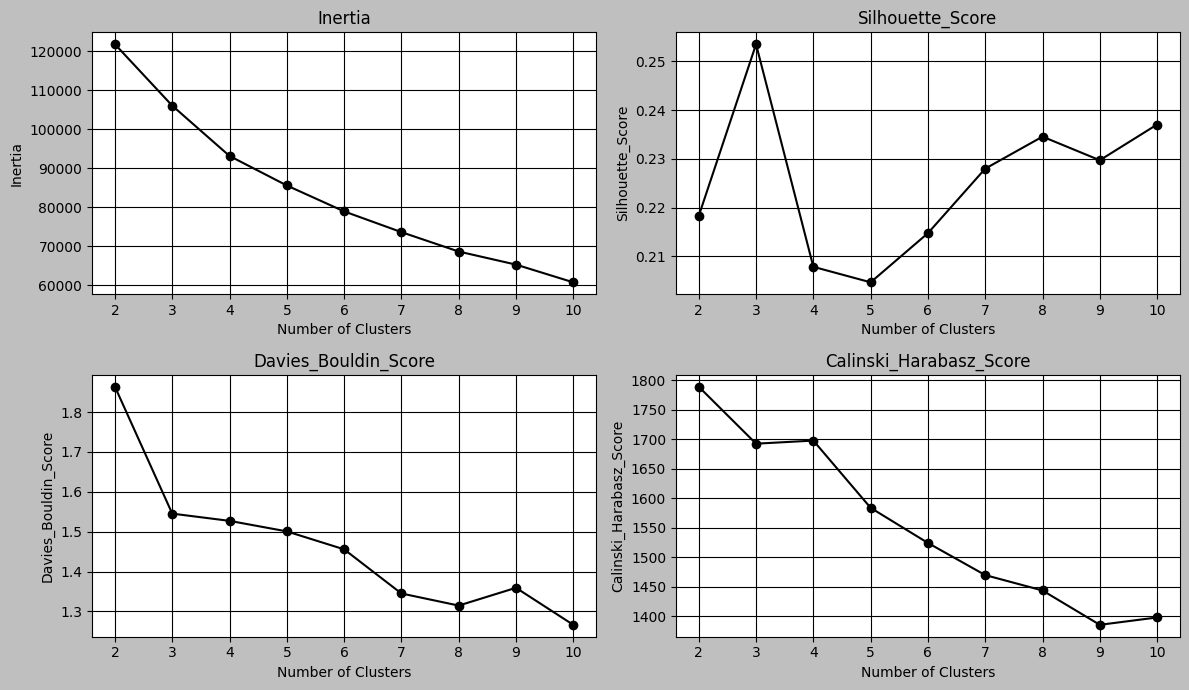

In [22]:
plot_metrics_comparison(metrics_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


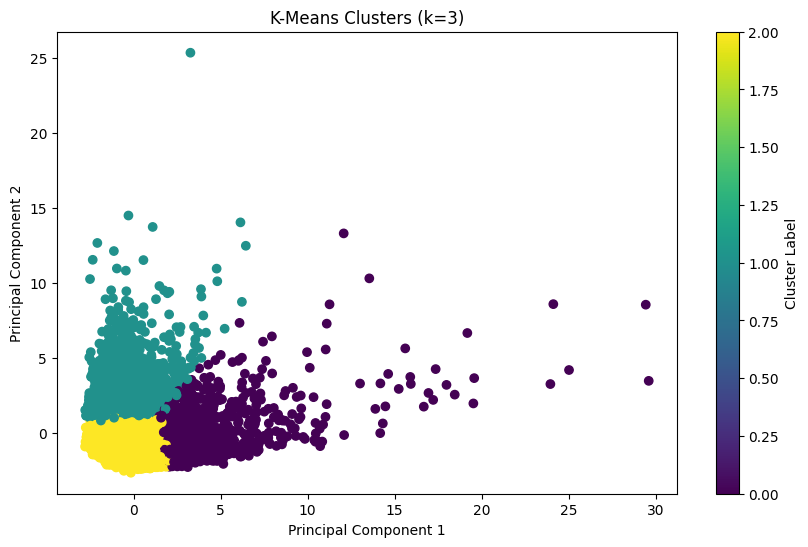

In [64]:
# Based on the evaluation metrics, choose the optimal number of clusters (e.g., based on Elbow and Silhouette)
optimal_clusters = 3  # Replace this with the observed optimal number from your analysis

# Apply K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(data)

# Add cluster labels to the DataFrame
principal_df['Cluster'] = cluster_labels

# Plot the clusters
if data.shape[1] >= 2:
    plt.figure(figsize=(10, 6))
    plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='viridis', marker='o')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'K-Means Clusters (k={optimal_clusters})')
    plt.colorbar(label='Cluster Label')
    plt.show()

In [24]:
print(principal_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.684314 -1.070768  0.471984  0.684865  0.052306  0.078428  0.818269   
1 -1.133114  2.509979  0.603254 -0.104770  0.691854 -1.081089 -0.389011   
2  0.968927 -0.383530  0.088842  1.246863 -2.162193 -0.376489 -1.528326   
3 -0.897179 -0.017775  1.528595  1.028845  0.183848 -0.200462 -0.211113   
4 -1.600472 -0.682058  0.342960  1.021378 -0.442195  0.079080  0.693015   

        PC8       PC9      PC10      PC11      PC12  Cluster  
0 -0.011086  0.119339 -0.078727 -0.236206 -0.051912        2  
1  0.189675  0.670419 -0.778600 -0.870321 -0.609628        1  
2 -0.245154 -0.864233 -0.001260 -0.762383  0.683952        2  
3 -0.762676 -0.018590  0.393368  0.749350  0.100636        2  
4  0.257740  0.576341 -0.122857 -0.455099 -0.109460        2  


In [65]:
#choosing better parameters

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Initial parameters
best_silhouette = -1
best_params = {}

# Trying different parameters
for init_method in ['k-means++', 'random']:
    for n_init_value in [10, 20]:
        for max_iter_value in [300, 500]:
            for algorithm_choice in ['lloyd', 'elkan']:
                kmeans = KMeans(
                    n_clusters=3,
                    init=init_method,
                    n_init=n_init_value,
                    max_iter=max_iter_value,
                    algorithm=algorithm_choice,
                    random_state=42
                )
                cluster_labels = kmeans.fit_predict(data)
                silhouette_avg = silhouette_score(data, cluster_labels)

                if silhouette_avg > best_silhouette:
                    best_silhouette = silhouette_avg
                    best_params = {
                        'init': init_method,
                        'n_init': n_init_value,
                        'max_iter': max_iter_value,
                        'algorithm': algorithm_choice
                    }

print("Best Silhouette Score: ", best_silhouette)
print("Best Parameters: ", best_params)

Best Silhouette Score:  0.25352633921740586
Best Parameters:  {'init': 'k-means++', 'n_init': 10, 'max_iter': 300, 'algorithm': 'lloyd'}


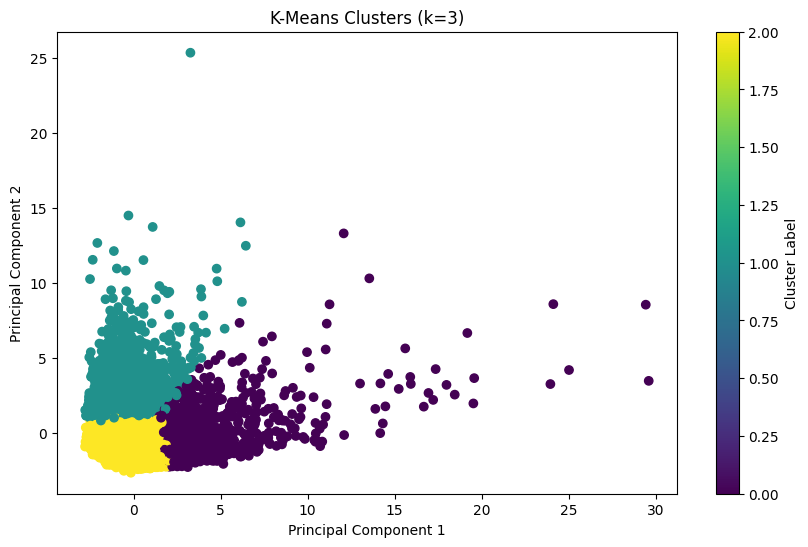

In [66]:
# Based on the evaluation of parameters,
optimal_clusters = 3  # Replace this with the observed optimal number from your analysis

# Apply K-Means with the optimal parameters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, init = 'k-means++', n_init=10, max_iter= 300,algorithm= 'lloyd' )
cluster_labels = kmeans.fit_predict(data)

# Add cluster labels to the DataFrame
principal_df['Cluster'] = cluster_labels

# Plot the clusters (if using 2 or 3 components for visualization)
if data.shape[1] >= 2:
    plt.figure(figsize=(10, 6))
    plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='viridis', marker='o')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'K-Means Clusters (k={optimal_clusters})')
    plt.colorbar(label='Cluster Label')
    plt.show()

**Evaluation metrics for KMEANS**

In [81]:
from sklearn.metrics import silhouette_score

# Assuming `kmeans` is your fitted KMeans model and `data` is your dataset
labels = kmeans.labels_
silhouette_avg = silhouette_score(data, labels)

print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.25352633921740586


In [82]:
from sklearn.metrics import davies_bouldin_score

# Assuming `kmeans` is your fitted KMeans model and `data` is your dataset
db_index = davies_bouldin_score(data, labels)

print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 1.5452793544786854


##Hierarchical Clustering (Agglomerative Clustering)

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

In [85]:
def evaluate_agglomerative_clusters(data, max_clusters=10):
    silhouette_scores = []
    davies_bouldin_scores = []
    calinski_harabasz_scores = []

    for k in range(2, max_clusters + 1):
        agglomerative = AgglomerativeClustering(n_clusters=k)
        cluster_labels = agglomerative.fit_predict(data)

        # Calculate evaluation metrics
        silhouette_scores.append(silhouette_score(data, cluster_labels))
        davies_bouldin_scores.append(davies_bouldin_score(data, cluster_labels))
        calinski_harabasz_scores.append(calinski_harabasz_score(data, cluster_labels))

    return silhouette_scores, davies_bouldin_scores, calinski_harabasz_scores

# Evaluate clusters from 2 to 10
max_clusters = 10
silhouette_scores, davies_bouldin_scores, calinski_harabasz_scores = evaluate_agglomerative_clusters(data, max_clusters=max_clusters)

# Create a DataFrame to compare the metrics
metrics_df = pd.DataFrame({
    'Num_Clusters': range(2, max_clusters + 1),
    'Silhouette_Score': silhouette_scores,
    'Davies_Bouldin_Score': davies_bouldin_scores,
    'Calinski_Harabasz_Score': calinski_harabasz_scores
})

# Print the metrics DataFrame
print(metrics_df)

   Num_Clusters  Silhouette_Score  Davies_Bouldin_Score  \
0             2          0.165056              2.116431   
1             3          0.182576              1.783971   
2             4          0.185537              1.465469   
3             5          0.146598              1.488509   
4             6          0.163612              1.613776   
5             7          0.181708              1.434505   
6             8          0.187412              1.377248   
7             9          0.192300              1.392320   
8            10          0.143357              1.469272   

   Calinski_Harabasz_Score  
0              1288.269456  
1              1241.533738  
2              1193.238247  
3              1159.202033  
4              1156.884864  
5              1166.378234  
6              1130.406342  
7              1112.757358  
8              1083.718971  


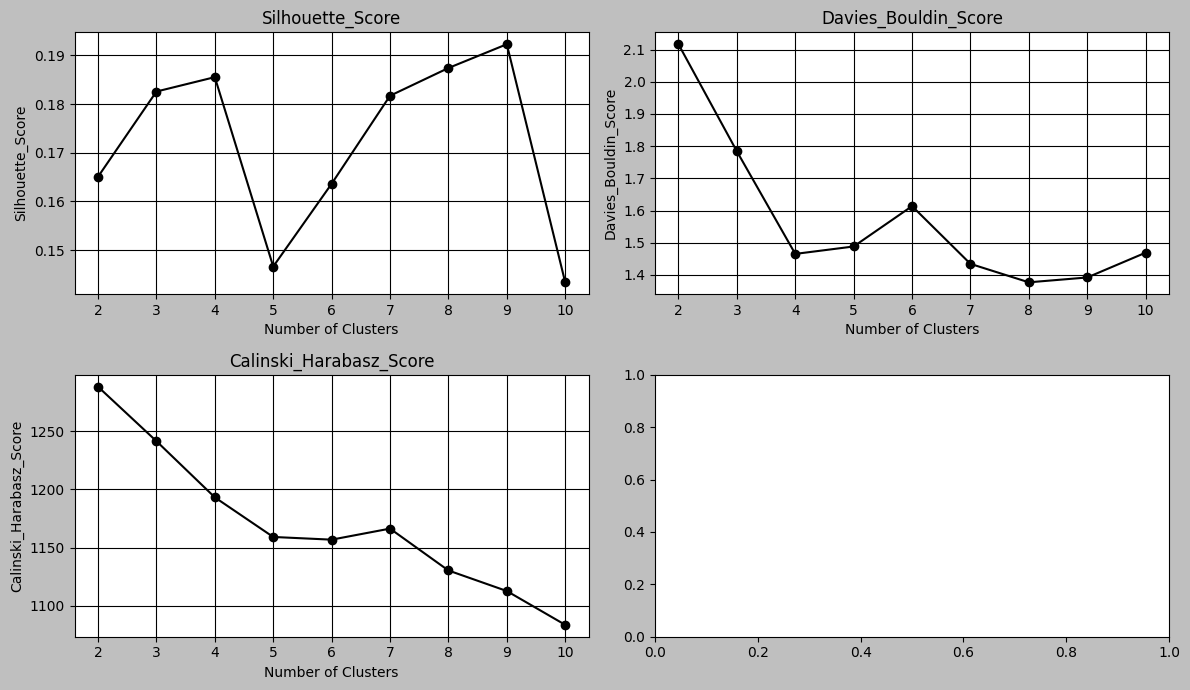

In [88]:
plot_metrics_comparison2(metrics_df)

**Choosing the number of clusters**

Silhouette Score:

Interpretation: A higher Silhouette Score indicates better-defined clusters. Scores closer to 1 indicate well-separated clusters, while scores close to 0 suggest overlapping clusters.

Observation: The Silhouette Score is highest for 9 clusters (0.1923) but is relatively low across all options, indicating that the clustering structure is somewhat weak or complex.

Davies-Bouldin Index:

Interpretation: Lower values indicate better clustering, with less cluster overlap and more distinct clusters.

Observation: The Davies-Bouldin Index decreases significantly as the number of clusters increases, with the best score at 8 clusters (1.3772). However, the score for 3 clusters (1.784) is relatively better compared to lower cluster counts.

Calinski-Harabasz Index:

Interpretation: Higher values indicate better-defined clusters with higher between-cluster variance relative to within-cluster variance.

Observation: The score is highest for 2 clusters (1288.27) and decreases as the number of clusters increases, suggesting that the data might naturally split better into fewer clusters.

**Summary and Decision:**

3 Clusters: This choice of 3 clusters is supported by a reasonable balance between the Silhouette Score and Davies-Bouldin Index. While the Calinski-Harabasz score is not the highest at 3 clusters, it’s still within an acceptable range.

9 Clusters: This configuration shows the highest Silhouette Score but slightly worse performance on the Davies-Bouldin Index and Calinski-Harabasz Index, suggesting more complex structures that might be harder to interpret.

2 Clusters: Although it has the highest Calinski-Harabasz score, the Silhouette Score and Davies-Bouldin Index suggest that the clustering might be too coarse.

Conclusion :
Stick with 3 Clusters: Given the moderate Silhouette Score and acceptable Davies-Bouldin Index, 3 clusters could provide a good balance between interpretability and model performance.

In [ ]:
optimal_clusters = 3  # based oh the results of Silhouette_Score

In [89]:
# Apply Agglomerative Clustering with the optimal number of clusters
agglomerative = AgglomerativeClustering(n_clusters=optimal_clusters)
cluster_labels = agglomerative.fit_predict(data)

# Add cluster labels to the DataFrame
principal_df['Cluster'] = cluster_labels

In [92]:
#Fine-Tuning
for linkage_method in ['ward', 'complete', 'average', 'single']:
    agglomerative = AgglomerativeClustering(n_clusters=optimal_clusters, linkage=linkage_method)
    cluster_labels = agglomerative.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    print(f"Linkage: {linkage_method}, Silhouette Score: {silhouette_avg}")

Linkage: ward, Silhouette Score: 0.18257646536466504
Linkage: complete, Silhouette Score: 0.7893081757234242
Linkage: average, Silhouette Score: 0.8381554776438339
Linkage: single, Silhouette Score: 0.8381554776438339


In [94]:
#using parameter of fine-tuning
# Apply Agglomerative Clustering with the optimal number of clusters
agglomerative = AgglomerativeClustering(n_clusters=optimal_clusters,linkage='average')
cluster_labels = agglomerative.fit_predict(data)

# Add cluster labels to the DataFrame
principal_df['Cluster'] = cluster_labels

In [96]:
from sklearn.metrics import silhouette_score

labels = kmeans.labels_
silhouette_avg = silhouette_score(data, cluster_labels)

print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.8381554776438339


In [97]:
from sklearn.metrics import davies_bouldin_score

# Assuming `kmeans` is your fitted KMeans model and `data` is your dataset
db_index = davies_bouldin_score(data, cluster_labels)

print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 0.10830639104503119


The evaluation metrics for Hierarchical Clustering are really good. We will continue evaluating other algorithms.

## DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

In [99]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler

In [103]:
# Assuming `principal_df` is the PCA-transformed DataFrame
data = principal_df.values
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [101]:
#Apply DBSCAN:
def apply_dbscan(data, eps_values, min_samples_values):
    best_silhouette = -1
    best_davies_bouldin = float('inf')
    best_params = {}
    best_labels = None

    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(data)

            # Calculate evaluation metrics
            if len(set(labels)) > 1:  # Avoid single cluster scenarios
                silhouette_avg = silhouette_score(data, labels) if len(set(labels)) > 1 else -1
                davies_bouldin = davies_bouldin_score(data, labels) if len(set(labels)) > 1 else float('inf')

                if silhouette_avg > best_silhouette:
                    best_silhouette = silhouette_avg
                    best_davies_bouldin = davies_bouldin
                    best_params = {'eps': eps, 'min_samples': min_samples}
                    best_labels = labels

    return best_silhouette, best_davies_bouldin, best_params, best_labels

In [104]:
#Define Range for Parameters and Run DBSCAN:

eps_values = [0.3, 0.5, 0.7, 1.0]
min_samples_values = [5, 10, 15, 20]

best_silhouette, best_davies_bouldin, best_params, best_labels = apply_dbscan(data_scaled, eps_values, min_samples_values)

print("Best Silhouette Score: ", best_silhouette)
print("Best Davies-Bouldin Score: ", best_davies_bouldin)
print("Best Parameters: ", best_params)

Best Silhouette Score:  0.12094951519400023
Best Davies-Bouldin Score:  2.6532280954680236
Best Parameters:  {'eps': 1.0, 'min_samples': 15}


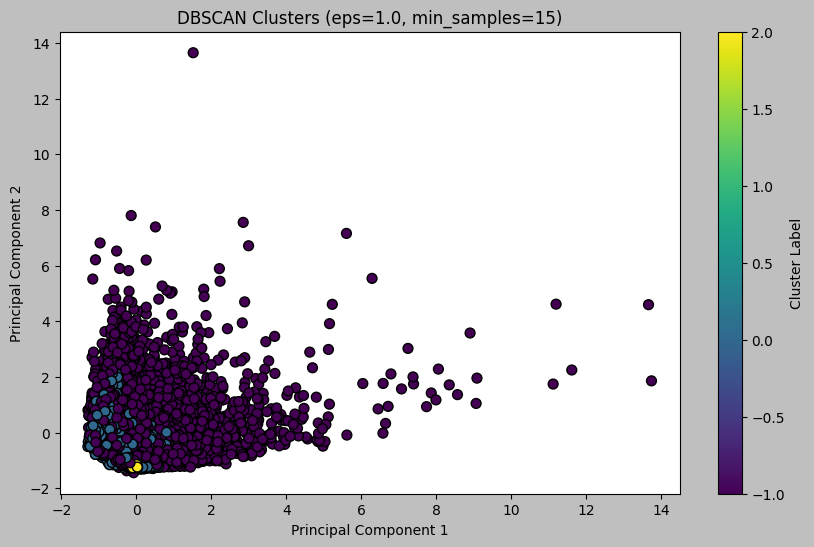

In [105]:
#Visualize Clusters:
if data_scaled.shape[1] >= 2:
    plt.figure(figsize=(10, 6))
    plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=best_labels, cmap='viridis', marker='o', s=50, edgecolor='k')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'DBSCAN Clusters (eps={best_params["eps"]}, min_samples={best_params["min_samples"]})')
    plt.colorbar(label='Cluster Label')
    plt.show()


## MEAN SHIFT

In [109]:
from sklearn.cluster import MeanShift
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler

# Standardize data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply Mean Shift
mean_shift = MeanShift()
cluster_labels = mean_shift.fit_predict(data_scaled)

# Evaluate
if len(set(cluster_labels)) > 1:  # Ignore noise-only cases
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    davies_bouldin = davies_bouldin_score(data_scaled, cluster_labels)
    print("Silhouette Score: ", silhouette_avg)
    print("Davies-Bouldin Score: ", davies_bouldin)
else:
    print("Mean Shift found only one cluster or noise.")

Silhouette Score:  0.27292417071750147
Davies-Bouldin Score:  0.8858467530967954


## MINI BATCH KMEANS

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitl

   Num_Clusters        Inertia  Silhouette_Score  Davies_Bouldin_Score  \
0             2  110154.536760          0.106267              3.363271   
1             3  102446.891885          0.130706              2.591400   
2             4   99151.241816          0.151609              2.393453   
3             5   94390.951199          0.144088              2.135622   
4             6   89035.340136          0.158075              1.989927   
5             7   83837.164130          0.161393              1.738015   
6             8   77509.621428          0.176208              1.647360   
7             9   80425.426322          0.160310              1.827669   
8            10   73665.416960          0.173986              1.641615   

   Calinski_Harabasz_Score  
0               523.544911  
1               620.349028  
2               533.068612  
3               537.369822  
4               570.930356  
5               603.625795  
6               665.408834  
7               541.314646 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


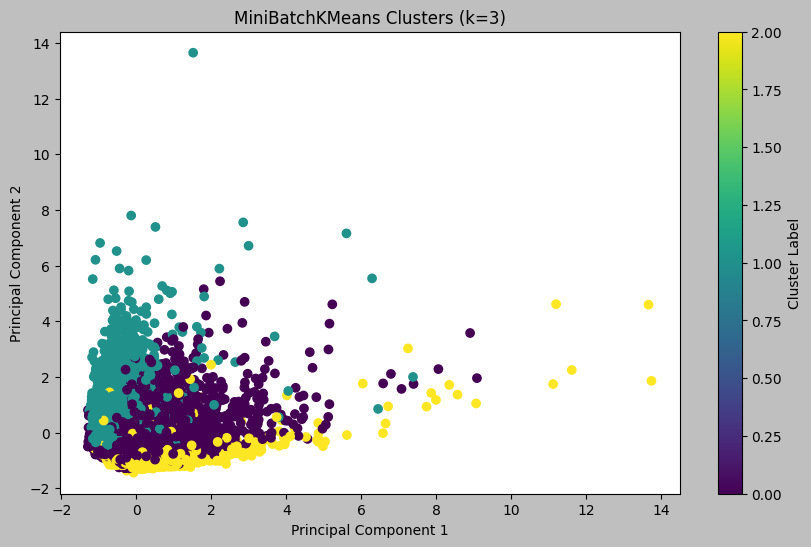

In [110]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler

# Standardize data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Function to evaluate MiniBatchKMeans
def evaluate_minibatch_kmeans(data, max_clusters=10, batch_size=100):
    inertia = []
    silhouette_scores = []
    davies_bouldin_scores = []
    calinski_harabasz_scores = []

    for k in range(2, max_clusters + 1):
        minibatch_kmeans = MiniBatchKMeans(n_clusters=k, batch_size=batch_size, random_state=42)
        cluster_labels = minibatch_kmeans.fit_predict(data)

        # Calculate evaluation metrics
        inertia.append(minibatch_kmeans.inertia_)
        silhouette_scores.append(silhouette_score(data, cluster_labels))
        davies_bouldin_scores.append(davies_bouldin_score(data, cluster_labels))
        calinski_harabasz_scores.append(calinski_harabasz_score(data, cluster_labels))

    return inertia, silhouette_scores, davies_bouldin_scores, calinski_harabasz_scores

# Evaluate MiniBatchKMeans from 2 to 10 clusters
max_clusters = 10
batch_size = 100  # You can adjust this based on your dataset size
inertia, silhouette_scores, davies_bouldin_scores, calinski_harabasz_scores = evaluate_minibatch_kmeans(data_scaled, max_clusters=max_clusters, batch_size=batch_size)

# Create a DataFrame to compare the metrics
metrics_df = pd.DataFrame({
    'Num_Clusters': range(2, max_clusters + 1),
    'Inertia': inertia,
    'Silhouette_Score': silhouette_scores,
    'Davies_Bouldin_Score': davies_bouldin_scores,
    'Calinski_Harabasz_Score': calinski_harabasz_scores
})

print(metrics_df)

# Choose the optimal number of clusters (e.g., based on Elbow and Silhouette)
optimal_clusters = 3  # Replace this with the observed optimal number from your analysis

# Apply MiniBatchKMeans with the optimal number of clusters
minibatch_kmeans = MiniBatchKMeans(n_clusters=optimal_clusters, batch_size=batch_size, random_state=42)
cluster_labels = minibatch_kmeans.fit_predict(data_scaled)

# Add cluster labels to the DataFrame
principal_df['Cluster'] = cluster_labels

# Plot the clusters (if using 2 or 3 components for visualization)
if data_scaled.shape[1] >= 2:
    plt.figure(figsize=(10, 6))
    plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=cluster_labels, cmap='viridis', marker='o')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'MiniBatchKMeans Clusters (k={optimal_clusters})')
    plt.colorbar(label='Cluster Label')
    plt.show()

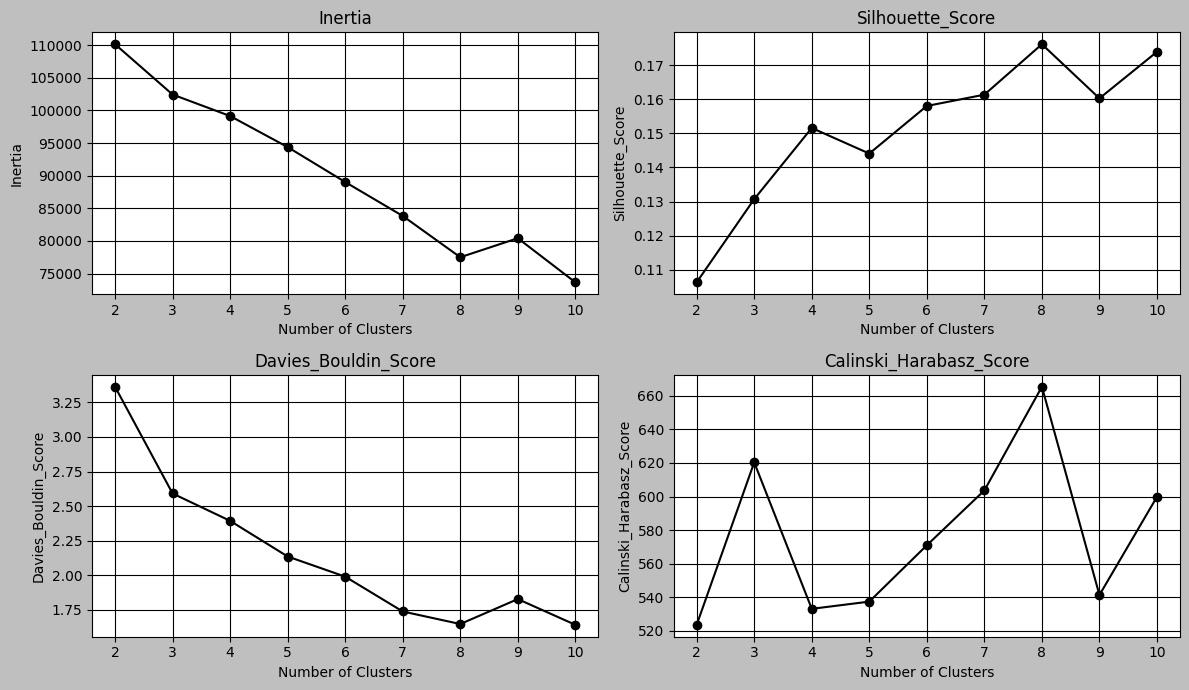

In [111]:
plot_metrics_comparison(metrics_df)

**FINE-TUNING**

In [121]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Initial parameters
best_silhouette = -1
best_params = {}

# Define parameter ranges
param_grid = {
    'n_clusters': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'batch_size': [50, 100, 200, 300],
    'init': ['k-means++', 'random'],
    'n_init': [10, 20],
    'max_iter': [300, 500],
    'tol': [1e-4, 1e-3]
}

# Iterate over parameter combinations
for n_clusters in param_grid['n_clusters']:
    for batch_size in param_grid['batch_size']:
        for init_method in param_grid['init']:
            for n_init_value in param_grid['n_init']:
                for max_iter_value in param_grid['max_iter']:
                    for tol_value in param_grid['tol']:
                        # Initialize MiniBatchKMeans with the current parameters
                        mini_batch_kmeans = MiniBatchKMeans(
                            n_clusters=n_clusters,
                            batch_size=batch_size,
                            init=init_method,
                            n_init=n_init_value,
                            max_iter=max_iter_value,
                            tol=tol_value,
                            random_state=42
                        )
                        # Fit and predict cluster labels
                        cluster_labels = mini_batch_kmeans.fit_predict(data)

                        # Calculate silhouette score
                        try:
                            silhouette_avg = silhouette_score(data, cluster_labels)
                        except ValueError:
                            silhouette_avg = -1  # Handle cases where silhouette score cannot be computed

                        # Update best parameters if current silhouette score is better
                        if silhouette_avg > best_silhouette:
                            best_silhouette = silhouette_avg
                            best_params = {
                                'n_clusters': n_clusters,
                                'batch_size': batch_size,
                                'init': init_method,
                                'n_init': n_init_value,
                                'max_iter': max_iter_value,
                                'tol': tol_value
                            }

print("Best Silhouette Score: ", best_silhouette)
print("Best Parameters: ", best_params)

Best Silhouette Score:  0.3474494274823429
Best Parameters:  {'n_clusters': 2, 'batch_size': 300, 'init': 'k-means++', 'n_init': 10, 'max_iter': 300, 'tol': 0.001}


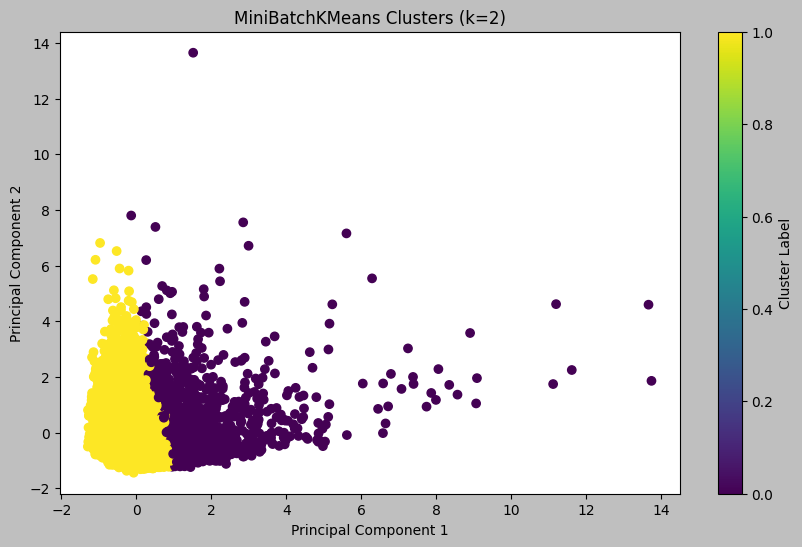

In [127]:


# Apply MiniBatchKMeans with the optimal parameters
# Choose the optimal number of clusters (e.g., based on Elbow and Silhouette)
optimal_clusters = 2

# Apply MiniBatchKMeans with the optimal number of clusters
minibatch_kmeans = MiniBatchKMeans(n_clusters=optimal_clusters, batch_size=300,
                                   init= 'k-means++', n_init=10,max_iter=300,
                                   tol=0.001,random_state=42)
cluster_labels = minibatch_kmeans.fit_predict(data)

# Add cluster labels to the DataFrame
principal_df['Cluster'] = cluster_labels

# Plot the clusters (if using 2 or 3 components for visualization)
if data_scaled.shape[1] >= 2:
    plt.figure(figsize=(10, 6))
    plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=cluster_labels, cmap='viridis', marker='o')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'MiniBatchKMeans Clusters (k={optimal_clusters})')
    plt.colorbar(label='Cluster Label')
    plt.show()

**EVALUATION METRICS**

In [128]:
from sklearn.metrics import silhouette_score

# Assuming `kmeans` is your fitted KMeans model and `data` is your dataset
labels = kmeans.labels_
silhouette_avg = silhouette_score(data, cluster_labels)

print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.3474494274823429


In [129]:
from sklearn.metrics import davies_bouldin_score

# Assuming `kmeans` is your fitted KMeans model and `data` is your dataset
db_index = davies_bouldin_score(data, cluster_labels)

print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 1.666932015964543


## SEGMENTATION

We will use the clusterization made with MiniBatchKMeans has better scoring than KMEANS.  The other algorithms as Hierarchical Clustering had better scorings, but the clusterization wasn't good.

In [130]:
df['Cluster']= principal_df['Cluster']
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [131]:
df_count = principal_df.groupby(by=["Cluster"]).size().reset_index(name="counts")
df_count

,Cluster,counts
0,0,1315
1,1,7634


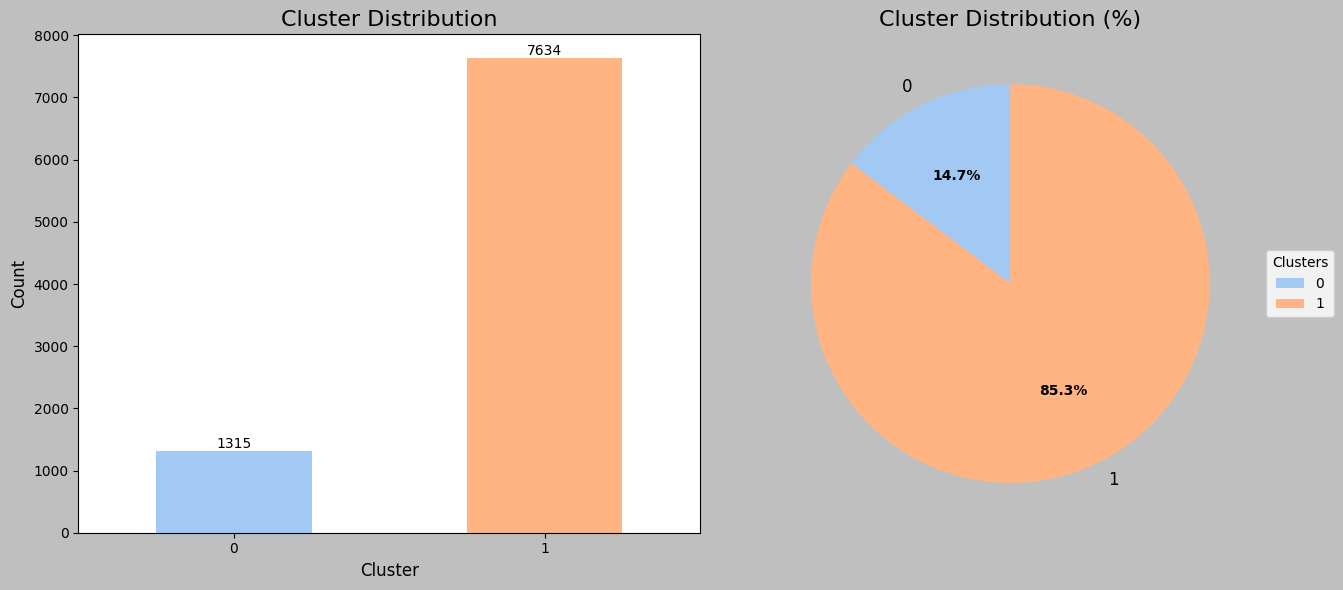

In [132]:
plot_cluster_distribution(principal_df)

### Interpretation

#### **Statistical Summary by Cluster**

In [133]:
def cluster_statistics(df, cluster_col='Cluster'):
    # Initialize a dictionary to hold the results
    stats_dict = {}

    # Iterate over each feature column in the DataFrame
    for column in df.columns:
        if column != cluster_col:  # Skip the Cluster column
            # Group by the cluster and calculate the desired statistics
            stats = df.groupby(cluster_col)[column].agg(
                mean='mean',
                median='median',
                Q1=lambda x: x.quantile(0.25),
                Q3=lambda x: x.quantile(0.75),
                IQR=lambda x: x.quantile(0.75) - x.quantile(0.25),  # Interquartile Range
                min='min',
                max='max',
                std='std',
                outliers=lambda x: ((x < (x.quantile(0.25) - 1.5 * (x.quantile(0.75) - x.quantile(0.25)))) |
                                    (x > (x.quantile(0.75) + 1.5 * (x.quantile(0.75) - x.quantile(0.25))))).sum()
            ).reset_index()

            # Store the result in the dictionary with the column name as the key
            stats_dict[column] = stats

    return stats_dict

# Example usage:
# Assuming df is your DataFrame with the 'Cluster' column
cluster_stats = cluster_statistics(df)
print('BALANCE')
print(cluster_stats['BALANCE'])
print('BALANCE_FREQUENCY')
print(cluster_stats['BALANCE_FREQUENCY'])
print('PURCHASES')
print(cluster_stats['PURCHASES'])
print('ONEOFF_PURCHASES')
print(cluster_stats['ONEOFF_PURCHASES'])
print('INSTALLMENTS_PURCHASES')
print(cluster_stats['INSTALLMENTS_PURCHASES'])
print('CASH_ADVANCE')
print(cluster_stats['CASH_ADVANCE'])
print('ONEOFF_PURCHASES_FREQUENCY')
print(cluster_stats['ONEOFF_PURCHASES_FREQUENCY'])
print('PURCHASES_INSTALLMENTS_FREQUENCY')
print(cluster_stats['PURCHASES_INSTALLMENTS_FREQUENCY'])
print('CASH_ADVANCE_FREQUENCY')
print(cluster_stats['CASH_ADVANCE_FREQUENCY'])
print('CASH_ADVANCE_TRX')
print(cluster_stats['CASH_ADVANCE_TRX'])
print('PURCHASES_TRX')
print(cluster_stats['PURCHASES_TRX'])
print('CREDIT_LIMIT')
print(cluster_stats['CREDIT_LIMIT'])
print('PAYMENTS')
print(cluster_stats['PAYMENTS'])
print('MINIMUM_PAYMENTS')
print(cluster_stats['MINIMUM_PAYMENTS'])
print('PRC_FULL_PAYMENT')
print(cluster_stats['PRC_FULL_PAYMENT'])
print('TENURE')
print(cluster_stats['TENURE'])

BALANCE
   Cluster         mean       median          Q1           Q3          IQR  \
0        0  2841.467033  1773.445786  467.266430  4257.756705  3790.490275   
1        1  1344.708169   789.216598   91.240419  1779.085864  1687.845444   

         min          max          std  outliers  
0  12.423203  19043.13856  3087.667133        48  
1   0.000000  14224.11541  1763.245495       576  
BALANCE_FREQUENCY
   Cluster      mean  median        Q1   Q3       IQR       min  max  \
0        0  0.981845     1.0  1.000000  1.0  0.000000  0.090909  1.0   
1        1  0.859350     1.0  0.818182  1.0  0.181818  0.000000  1.0   

        std  outliers  
0  0.075422       121  
1  0.250098       945  
PURCHASES
   Cluster         mean  median        Q1       Q3       IQR  min       max  \
0        0  4102.736510  3030.4  2021.535  4672.57  2651.035  0.0  49039.57   
1        1   469.424253   250.0     0.000   678.24   678.240  0.0   5080.85   

           std  outliers  
0  4207.135191        

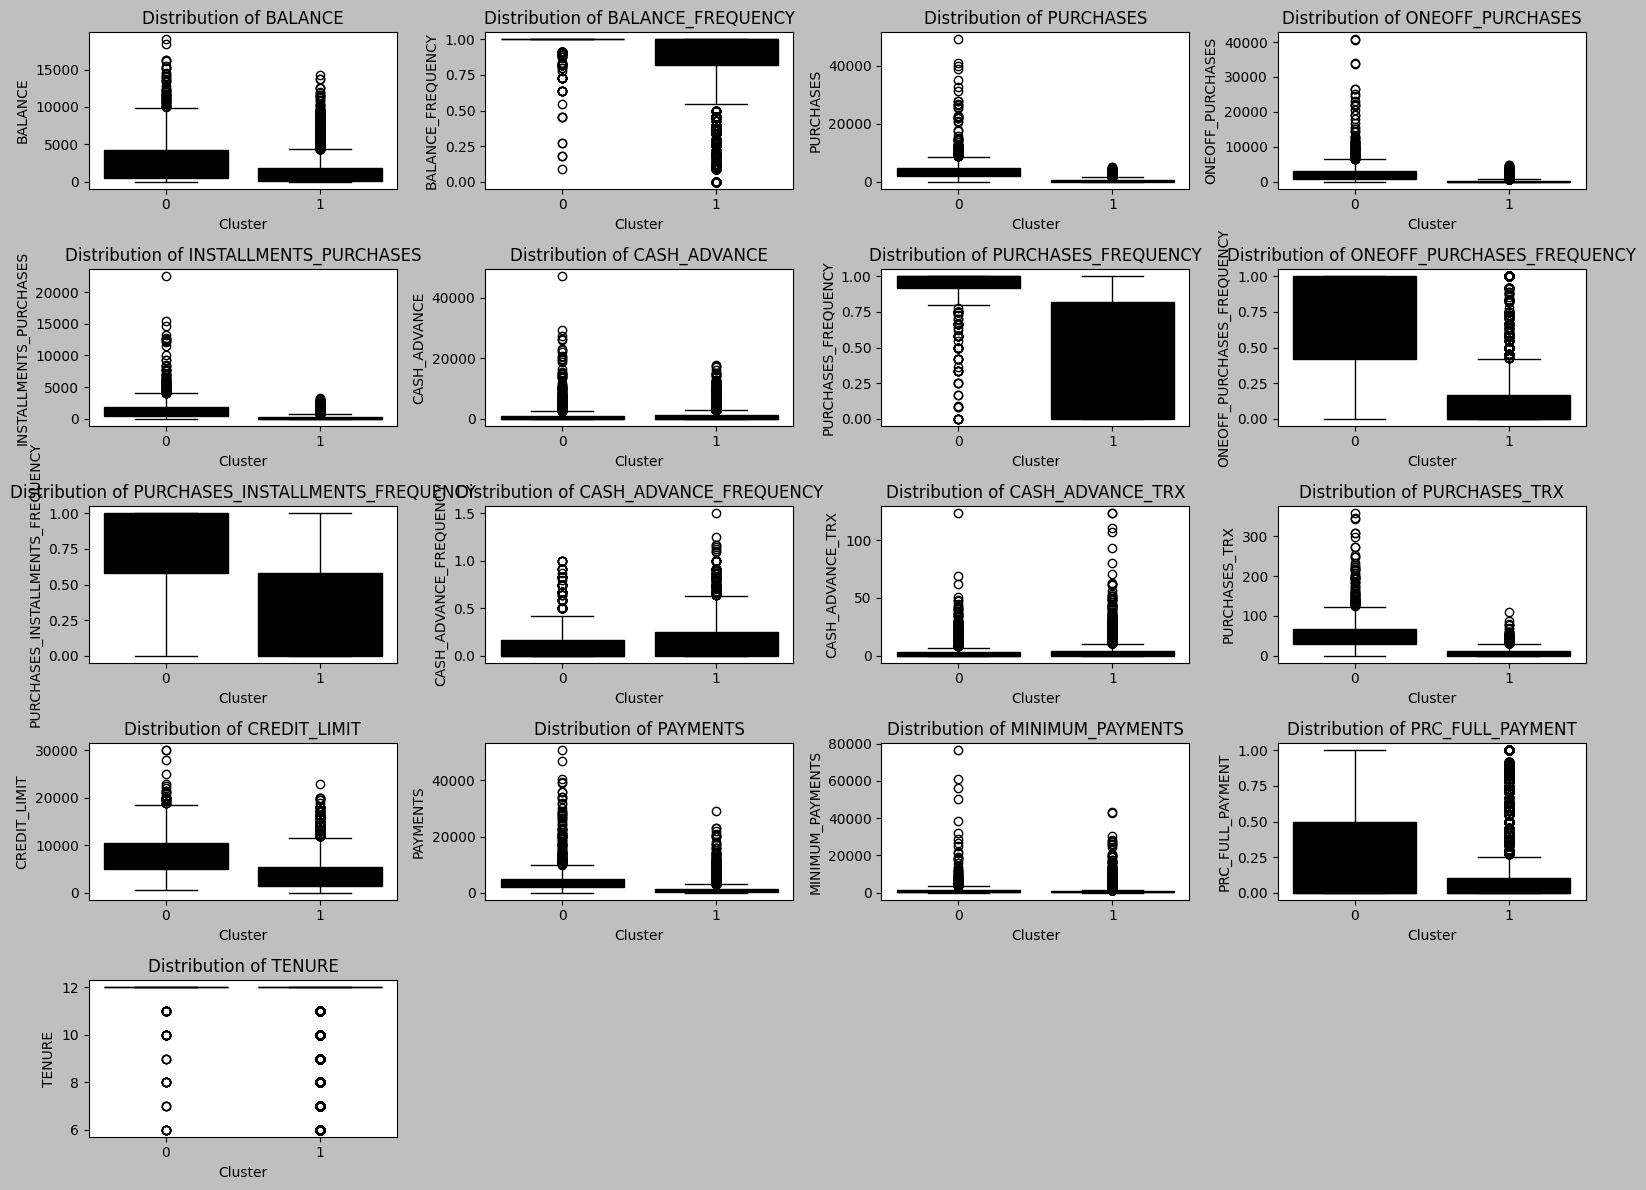

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt


def plot_all_features_by_cluster(df, cluster_column='Cluster', plots_per_row=4, figsize=(16, 12)):
    """
    Plots the distribution of all features in the dataset by cluster using boxplots arranged in a grid.

    Parameters:
        df (pd.DataFrame): The dataframe containing features and cluster assignments.
        cluster_column (str): The column name representing the cluster assignment.
        plots_per_row (int): Number of plots per row.
        figsize (tuple): The overall figure size.
    """
    # List of features to plot
    features = [col for col in df.columns if col != cluster_column]

    # Determine the number of rows needed
    num_features = len(features)
    num_rows = (num_features + plots_per_row - 1) // plots_per_row  # Ceiling division

    # Create a figure with the calculated number of subplots
    fig, axes = plt.subplots(num_rows, plots_per_row, figsize=figsize)
    axes = axes.flatten()  # Flatten the 2D array of axes to easily iterate over

    for i, feature in enumerate(features):
        sns.boxplot(x=cluster_column, y=feature, data=df, ax=axes[i])
        axes[i].set_title(f'Distribution of {feature}')

    # Remove any unused axes if the number of features isn't a perfect multiple of plots_per_row
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()



plot_all_features_by_cluster(df)

**Cluster Profile Overview**

Each cluster can be described based on key statistics such as the mean, median, quartiles, and outliers for various features. Here's a step-by-step approach:


Cluster 0 Profile

- Balance:

  Observations: High mean balance with significant variability and a large number of outliers.
- Balance Frequency:

  Observations: Almost all balances are updated frequently, very few outliers.

- Purchases:

  Observations: High average purchases with a wide range of values and moderate outlier presence.

- One-Off Purchases:

  Observations: High mean one-off purchases, large variability, and significant outliers.

- Installments Purchases:  
  Observations: High mean value with a wide range and notable outliers.
  
- Cash Advance:  
  
  Observations: Large mean cash advance but many zero values and some outliers.
  
- One-Off Purchases Frequency:

  Observations: Moderate frequency of one-off purchases, no significant outliers.

- Purchases Installments Frequency:

  Observations: High frequency of installment purchases, no significant outliers.

- Cash Advance Frequency:
  
  Observations: Low frequency of cash advances with some outliers.
  
- Cash Advance Transactions:

  Observations: High average transactions with a wide range and moderate outliers.

-Purchases Transactions:

  Observations: High transaction mean, moderate variability, and some outliers.

- Credit Limit:

  Observations: High mean credit limit with a wide range of values and moderate outliers.

- Payments:
  
  Observations: High average payments with significant variability and some outliers.

- Minimum Payments:

  Observations: High mean minimum payments with a wide range and some outliers.

- Percent Full Payment:

  Observations: Low percentage of full payments with no outliers.

- Tenure:

  Observations: Stable tenure with very little variability and some outliers.

**Cluster 1 Profile**

- Balance:

  Observations: Lower average balance compared to Cluster 0, but with more outliers.
- Balance Frequency:
  
  Observations: Similar high frequency of balance updates as Cluster 0, but more variability.

- Purchases:

  Observations: Significantly lower purchases compared to Cluster 0 with more outliers.

- One-Off Purchases:

  Observations: Lower one-off purchases with many zero values and high variability.

- Installments Purchases:

  Observations: Lower mean compared to Cluster 0 with a large number of outliers.

- Cash Advance:

  Observations: Lower cash advance mean compared to Cluster 0 with a broader range.

- One-Off Purchases Frequency:

  Observations: Very low frequency of one-off purchases with high outlier count.

- Purchases Installments Frequency:

  Observations: Lower frequency of installment purchases with no significant outliers.

- Cash Advance Frequency:

  Observations: Slightly higher frequency of cash advances compared to Cluster 0.

- Cash Advance Transactions:

  Observations: Slightly lower transaction mean compared to Cluster 0 with more variability.

- Purchases Transactions:

  Observations: Significantly lower transaction mean with more outliers.

- Credit Limit:

  Observations: Lower credit limit compared to Cluster 0 with more variability and outliers.

- Payments:

  Observations: Lower average payments compared to Cluster 0 with a broader range.

- Minimum Payments:

  Observations: Lower minimum payments with a wider range and more outliers.

- Percent Full Payment:

  Observations: Lower percentage of full payments with a large number of zero values.

- Tenure:

Observations: Similar tenure as Cluster 0 with higher variability.

**Summary and Interpretation**

Cluster 0: Characterized by higher average balances, higher spending, and greater variability in transactions. This cluster may represent customers with higher credit utilization and spending power.

Cluster 1: Characterized by lower average balances, lower spending, and more frequent updates on balances and purchases. This cluster might represent customers with more controlled credit usage and lower spending behavior.

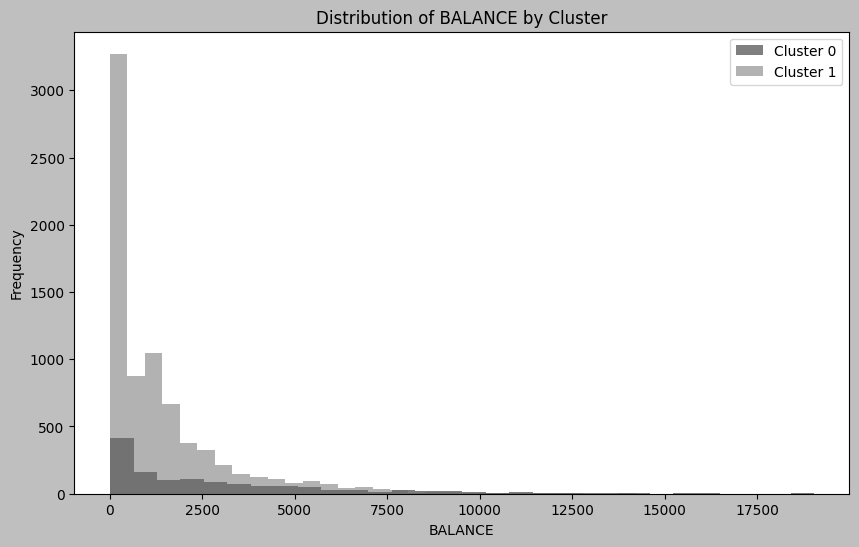

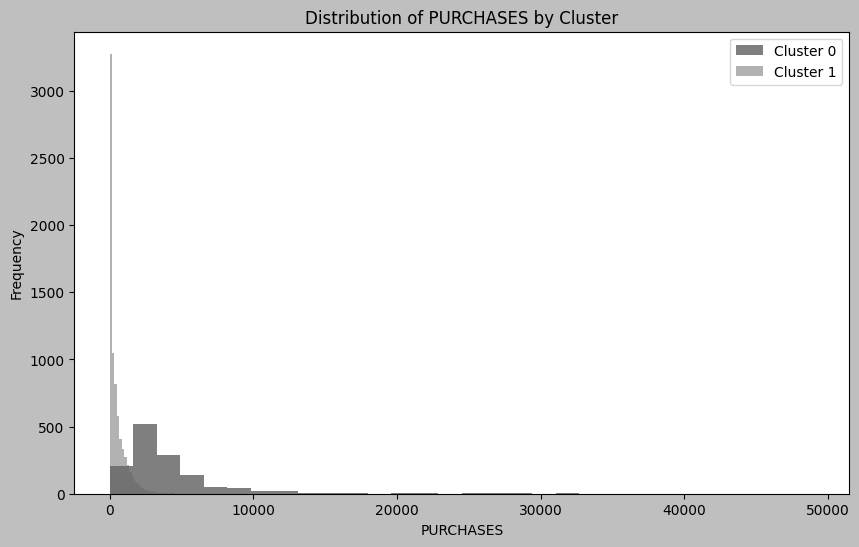

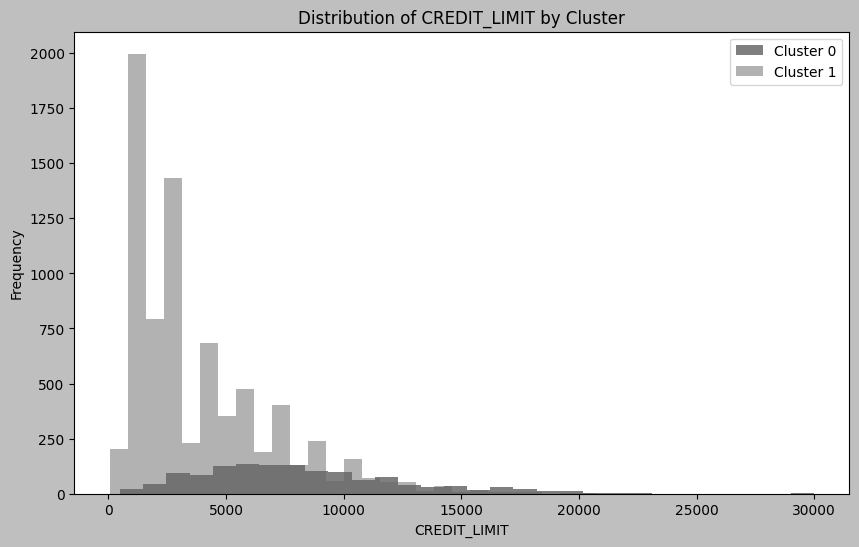

In [136]:
import matplotlib.pyplot as plt

# Example function to plot feature distributions by cluster
def plot_feature_distribution(data, feature):
    plt.figure(figsize=(10, 6))
    for cluster in sorted(data['Cluster'].unique()):
        subset = data[data['Cluster'] == cluster]
        plt.hist(subset[feature], bins=30, alpha=0.5, label=f'Cluster {cluster}')
    plt.title(f'Distribution of {feature} by Cluster')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Plot distributions for key features
for feature in ['BALANCE', 'PURCHASES', 'CREDIT_LIMIT']:
    plot_feature_distribution(df, feature)

**Comparison Between Original and PCA-transformed Data**

- **Cluster Distribution Comparison**

In [137]:
original_clusters = df['Cluster'].value_counts()
pca_clusters = principal_df['Cluster'].value_counts()

comparison_df = pd.DataFrame({
    'Original Data': original_clusters,
    'PCA Data': pca_clusters
})
print(comparison_df)

         Original Data  PCA Data
Cluster                         
1                 7634      7634
0                 1315      1315


- **Correlate PCA with Original Features:**

In [138]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Cluster'],
      dtype='object')

In [139]:
pca_corr = pd.DataFrame(pca.components_, columns=df.columns[:-1]).T
pca_corr.columns = [f'PC{i+1}' for i in range(pca.n_components_)]
print(pca_corr)

                                       PC1       PC2       PC3       PC4  \
BALANCE                           0.101916  0.403766 -0.161962  0.277990   
BALANCE_FREQUENCY                 0.120518  0.131671 -0.423569  0.157764   
PURCHASES                         0.411556  0.039702  0.257197  0.042174   
ONEOFF_PURCHASES                  0.346324  0.061614  0.390394  0.086918   
INSTALLMENTS_PURCHASES            0.336761 -0.019380 -0.109000 -0.059986   
CASH_ADVANCE                     -0.022675  0.438954 -0.021717 -0.257098   
PURCHASES_FREQUENCY               0.321138 -0.191269 -0.370315 -0.196199   
ONEOFF_PURCHASES_FREQUENCY        0.294433 -0.018772  0.115884  0.036125   
PURCHASES_INSTALLMENTS_FREQUENCY  0.274419 -0.178945 -0.468394 -0.228177   
CASH_ADVANCE_FREQUENCY           -0.088408  0.434155 -0.103407 -0.264564   
CASH_ADVANCE_TRX                 -0.048004  0.419620 -0.108635 -0.328612   
PURCHASES_TRX                     0.390581 -0.020415 -0.075490 -0.021666   
CREDIT_LIMIT

**Key Observations from PCA Loadings:**

- PC1: High loadings on PURCHASES (0.411556), ONEOFF_PURCHASES (0.346324), and PURCHASES_TRX (0.390581). This suggests PC1 is primarily driven by overall spending and transaction activity.

- PC2: Significant loadings on CASH_ADVANCE (0.438954), CASH_ADVANCE_FREQUENCY (0.434155), and CASH_ADVANCE_TRX (0.419620). This indicates PC2 is associated with cash advance activity and frequency.

- PC3: High loadings on MINIMUM_PAYMENTS (-0.239480), PRC_FULL_PAYMENT (0.126859), and CREDIT_LIMIT (0.101039). PC3 appears related to payment behavior and credit limits.

- PC4: High loadings on TENURE (0.439288), INSTALLMENTS_PURCHASES (-0.059986), and ONEOFF_PURCHASES (0.086918). PC4 captures aspects related to the length of tenure and purchase behavior.

**Complementing PCA with Cluster Statistics**
- Cluster 0 vs. Cluster 1:
  - Cluster 0 Characteristics:

    High Spending and Balance: High mean values for BALANCE, PURCHASES, and INSTALLMENTS_PURCHASES. PCA suggests these features contribute significantly to PC1.

    Frequent Transactions: High values in PURCHASES_TRX and ONEOFF_PURCHASES align with the high loadings on PC1.
    
    Credit Usage: Higher CREDIT_LIMIT and significant payments. PC3 indicates a relationship with credit behavior.
- Cluster 1 Characteristics:

  Lower Spending and Balance: Lower mean values for BALANCE, PURCHASES, and INSTALLMENTS_PURCHASES. This is consistent with lower values on PC1.

  Lower Cash Advances: Lower mean values for CASH_ADVANCE and CASH_ADVANCE_TRX align with high loadings on PC2 for cash advances.

  Payment Behavior: Higher MINIMUM_PAYMENTS and lower PRC_FULL_PAYMENT, relating to PC3's focus on payment behavior.

**Insights and Conclusions**

PC1 (Spending and Transactions):

Cluster 0 has high scores on PC1, indicating higher overall spending and transaction activity. This aligns with the cluster's higher mean values for features related to spending (PURCHASES, ONEOFF_PURCHASES).
Cluster 1 has lower scores on PC1, reflecting lower spending and transaction activity.

PC2 (Cash Advance Activity):

Cluster 0 has a lower score on PC2, suggesting less emphasis on cash advances compared to Cluster 1. Cluster 1, with its higher score on PC2, indicates a greater tendency towards cash advances and related behaviors.

PC3 (Payment Behavior and Credit Limits):

Cluster 0 shows higher mean values for CREDIT_LIMIT and significant payments, aligning with higher scores on PC3.
Cluster 1 has lower mean values for CREDIT_LIMIT and MINIMUM_PAYMENTS, consistent with lower scores on PC3.

PC4 (Tenure and Installment Purchases):

Cluster 0 shows a longer tenure and higher values for INSTALLMENTS_PURCHASES, reflecting higher scores on PC4. This cluster might have a longer credit history and more frequent installment purchases.
Cluster 1 has a shorter tenure and lower values for installment purchases, indicating a different credit usage pattern.

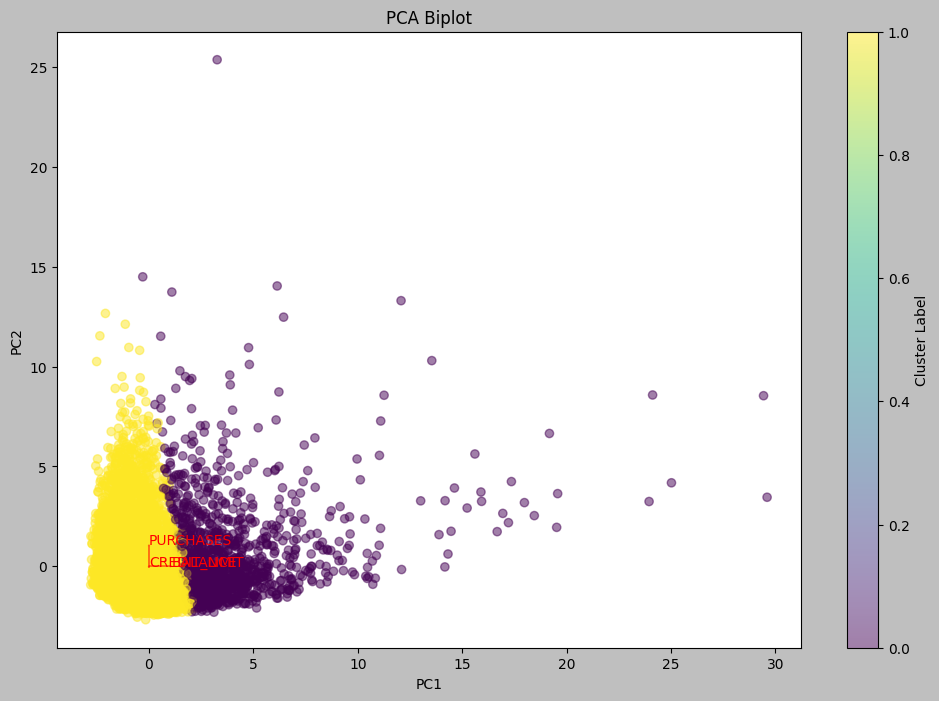

In [141]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming pca and data are defined
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data)

# Create a biplot
plt.figure(figsize=(12, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.colorbar(label='Cluster Label')
plt.xlabel('PC1')
plt.ylabel('PC2')

key_features=['BALANCE', 'PURCHASES', 'CREDIT_LIMIT']

# Add feature vectors
for i, feature in enumerate(key_features):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='r', alpha=0.5, head_width=0.05)
    plt.text(pca.components_[0, i] * 1.1, pca.components_[1, i] * 1.1, feature, color='r')

plt.title('PCA Biplot')
plt.show()